# Trabajo Práctico 2 - Machine Learning
*Felicitas Marolda*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib

## Parte 1: Diagnóstico de Cancer de Mama
El conjunto de datos de este problema fue generado a partir de imágenes histopatológicas de biopsias mamarias. Se extrajeron variables morfológicas y moleculares de las células, incluyendo tamaño, forma, densidad nuclear, tasa de mitosis y presencia de mutaciones. El objetivo es predecir el diagnóstico del tumor (benigno o maligno). Para una descripción más detallada del conjunto de datos, consulte cell_diagnosis_description.md. 

In [3]:
import sys
import os
# sys.path.append('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src')  # Reemplaza con la ruta real
sys.path.append(os.path.abspath('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src'))

import models as mod
importlib.reload(mod)
import metrics as met
importlib.reload(met)
import preprocessing as pp
importlib.reload(pp)

<module 'preprocessing' from 'c:\\Users\\felic\\OneDrive\\Documentos\\GitHub\\MLyDL_TPs\\Marolda_Felicitas_TP2\\Problema1\\src\\preprocessing.py'>

In [4]:
cell_diagnosis_dev_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev_imbalanced.csv')
cell_diagnosis_dev = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev.csv')
cell_diagnosis_test_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test_imbalanced.csv')
cell_diagnosis_test = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test.csv')

### Ejercicio 1.1
Realizar un análisis exploratorio de los datos para visualizar la distribución de las variables e identificar valores faltantes, outliers y variables categóricas. Investigar los rangos posibles de cada feature y analizar su correlación con el target.

In [5]:
# imprimimos una muestra de los datos
print(cell_diagnosis_dev_imbalanced.sample(5))
print("-"*50)
print(cell_diagnosis_dev.sample(5))

print(cell_diagnosis_dev.describe())
# hacemos un pairplot para ver la distribucion de los datos
# sns.pairplot(cell_diagnosis_dev, hue='CellType', palette='husl')  
# plt.title('Pairplot of Cell Diagnosis Dataset')
# plt.show()

# sns.pairplot(cell_diagnosis_dev_imbalanced, hue='CellType', palette='rocket')
# plt.title('Pairplot of Cell Diagnosis Dataset (Imbalanced)')
# plt.show()

        CellSize  CellShape  NucleusDensity  ChromatinTexture  CytoplasmSize  \
847    67.062694        NaN        1.429433         24.762596      30.427436   
1166   67.637680   0.487677        1.494927         21.031910      24.855478   
660   418.683806   4.080270             NaN        212.032325     248.558927   
860    69.755349   0.510941        1.442396         22.027739      29.147289   
1059   69.169796   0.496613        1.444850         22.541259      27.771191   

      CellAdhesion  MitosisRate  NuclearMembrane  GrowthFactor  \
847       0.528385     3.034874         2.662392     60.518332   
1166      0.461081          NaN         2.536891     57.946044   
660       3.028947    15.100492        14.906094    335.647930   
860       0.472229     3.025516         2.253797     60.983655   
1059      0.502195     3.089010         2.498495     59.034694   

      OxygenSaturation  Vascularization  InflammationMarkers  Diagnosis  \
847          80.435127         4.896461        

In [6]:
cell_diagnosis_dev_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev_imbalanced.csv')
cell_diagnosis_dev = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev.csv')
cell_diagnosis_test_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test_imbalanced.csv')
cell_diagnosis_test = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test.csv')

importlib.reload(pp)
importlib.reload(mod)

new_df_dev = pp.prepare_df(cell_diagnosis_dev)
new_df_dev_imbalanced = pp.prepare_df(cell_diagnosis_dev_imbalanced)

    CellSize  CellShape  NucleusDensity  ChromatinTexture  CytoplasmSize  \
0  63.423148   0.500594        1.473261         23.300222      28.448318   

   CellAdhesion  MitosisRate  NuclearMembrane  GrowthFactor  OxygenSaturation  \
0      0.477657     3.434832         2.492852         -10.0         78.625935   

   Vascularization  InflammationMarkers  Diagnosis  GeneticMutationBinary  \
0         5.727217            41.158399        0.0                      0   

   Unknown  Epthlial  Mesnchymal  
0        0         1           0  
    CellSize  CellShape  NucleusDensity  ChromatinTexture  CytoplasmSize  \
0  67.663374   0.513293        1.483674         22.051707      27.252767   

   CellAdhesion  MitosisRate  NuclearMembrane  GrowthFactor  OxygenSaturation  \
0       0.47699      3.32595         2.449179     58.451676         79.940819   

   Vascularization  InflammationMarkers  Diagnosis  GeneticMutationBinary  \
0         5.544034            44.252979        0.0                

### Ejercicio 1.2
Implementar una clase de regresión logística binaria con regularización L2. Utilizando el conjunto de datos de desarrollo cell_diagnosis_balanced_dev.csv, dividir los datos en 80% entrenamiento y 20% validación. Entrenar el modelo sobre el conjunto de entrenamiento y evaluar su desempeño sobre el conjunto de validación.

Reportar las siguientes métricas de performance:
– Matriz de confusión
– Accuracy
– Precision
– Recall
– F-Score
– Curva Precision-Recall (PR)
– Curva ROC
– AUC-ROC
– AUC-PR

Para ajustar el hiperparámetro de regularización λ, puede utilizar F-Score como métrica de performance.

**NOTA**: Si el modelo se implementa de forma general para clasificación multiclase, el mismo código podrá ser reutilizado en el ejercicio 2.

In [7]:
# dividirmos 20% validation y 80% train
importlib.reload(pp)
train_data, val_data = pp.split_data(new_df_dev, 0.2)
print("train_data shape: ", train_data.shape)
print("val_data shape: ", val_data.shape)
# train_X, train_y, features = pp.df_breakDown(train_data, 'Diagnosis')
# val_X, val_y, _ = pp.df_breakDown(val_data, 'Diagnosis')

# print("train_X shape: ", train_X.shape)
# print("train: ", train_X[0])


print("train head: ", train_data.head(1))


train_data shape:  (1330, 17)
val_data shape:  (333, 17)
train head:      CellSize  CellShape  NucleusDensity  ChromatinTexture  CytoplasmSize  \
0  63.423148   0.500594        1.473261         23.300222      28.448318   

   CellAdhesion  MitosisRate  NuclearMembrane  GrowthFactor  OxygenSaturation  \
0      0.477657     3.434832         2.492852         -10.0         78.625935   

   Vascularization  InflammationMarkers  Diagnosis  GeneticMutationBinary  \
0         5.727217            41.158399        0.0                      0   

   Unknown  Epthlial  Mesnchymal  
0        0         1           0  


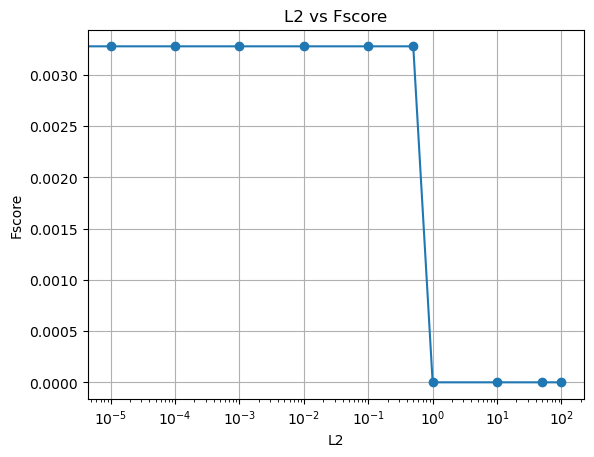

Best L2:  0


In [8]:
importlib.reload(mod)
importlib.reload(pp)
importlib.reload(met)
# entrenamos el modelo
possible_L2 = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100]
possible_threshold = [0.0001, 0.01, 0.3, 0.4, 0.5, 0.6, 0.7, 0.99]

best_L2 = pp.cross_validation_for_L2(train_data, possible_L2)
print("Best L2: ", best_L2)

In [9]:
importlib.reload(mod)
importlib.reload(pp)
importlib.reload(met)

# print(train_data.head(10))
X_train, y_train, features = pp.df_breakDown(train_data, y='Diagnosis')
X_val, y_val, _ = pp.df_breakDown(val_data, y='Diagnosis')

# print("Distribución de Diagnosis en train:")
# print(X_train_fold['Diagnosis'].value_counts())

print("mean: ", pp.mean(X_train))
X_train_norm = pp.normalization(X_train)
X_val = pp.normalization(X_val, pp.mean(X_train), pp.std(X_train), pp.get_bounds(X_train))

model = mod.Logistic_Regression(X_train_norm, y_train, features, 1, 0.5)
model_prediciton = model.predict(X_val)
# print("Predicciones: ", model_prediciton)
model_proba = model.predict_proba(X_val)
# print(model.coef)

mean:  [69.70432315  0.49883191  1.44503482 22.06680963 28.4483184   0.47483556
  3.0802472   2.41446415 60.99396892 79.98732802  5.06809866 40.85915433
  1.          0.          0.          0.        ]


===== MÉTRICAS =====
 Accuracy  Precision  Recall  F1-score  AUC-ROC   AUC-PR
  0.84985   0.818182 0.80597   0.81203 0.844146 0.789788


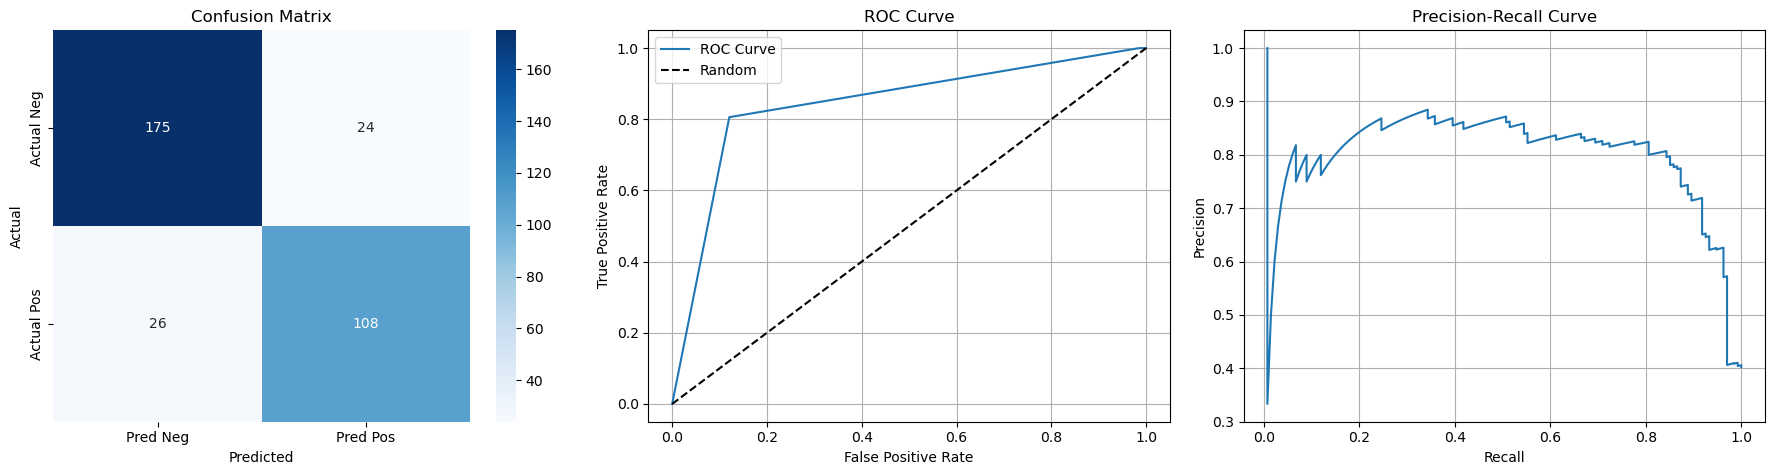

,Accuracy,Precision,Recall,F1-score,AUC-ROC,AUC-PR
0,0.84985,0.818182,0.80597,0.81203,0.844146,0.789788


In [10]:
importlib.reload(met)

met.get_metrics(y_val, model_prediciton, model_proba)

### Ejercicio 1.3

Utilizando el conjunto de datos de test cell_diagnosis_balanced_test.csv, evalúe la performance del modelo desarrollado anteriormente computando las métricas de performance indicadas en el inciso 1.2.

[69.70432315  0.49883191  1.44503482 22.06680963 28.4483184   0.47483556
  3.0802472   2.41446415 60.99396892 79.98732802  5.06809866 40.85915433
  1.          0.          0.          0.        ]
===== MÉTRICAS =====
 Accuracy  Precision   Recall  F1-score  AUC-ROC  AUC-PR
 0.859459    0.87013 0.807229    0.8375  0.85554 0.82738


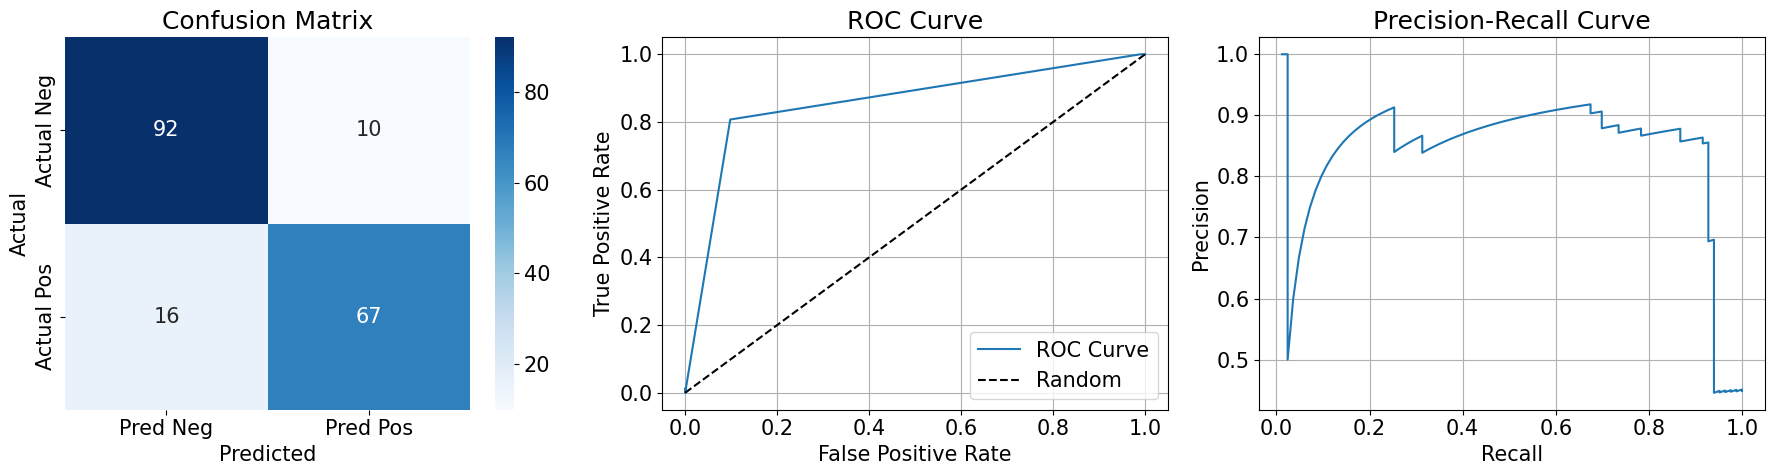

,Accuracy,Precision,Recall,F1-score,AUC-ROC,AUC-PR
0,0.859459,0.87013,0.807229,0.8375,0.85554,0.82738


In [11]:
importlib.reload(met)
importlib.reload(pp)
importlib.reload(mod)

cell_diagnosis_test_ = pp.prepare_df_test(cell_diagnosis_test, new_df_dev)
X_test, y_test, features = pp.df_breakDown(cell_diagnosis_test_, y='Diagnosis')

print(pp.mean(X_train))
X_test = pp.normalization(X_test, pp.mean(X_train), pp.std(X_train), pp.get_bounds(X_train))

model_prediciton_test = model.predict(X_test)
model_prediction_proba_test = model.predict_proba(X_test)

met.get_metrics(y_test, model_prediciton_test, model_prediction_proba_test)

### Ejercicio 1.4: Rebalanceo de Clases en Conjuntos Desbalanceados

Utilizando el conjunto de datos de desarrollo cell_diagnosis_imbalanced_dev.csv, dividir los datos en 80% entrenamiento y 20% validación. Entrenar distintos modelos de regresión logística binaria con regularización L2, aplicando una técnica de re-balanceo distinta en cada caso:

1) Sin rebalanceo: entrenar el modelo directamente sobre los datos desbalanceados.
2) Undersampling: eliminar muestras de la clase mayoritaria de manera aleatoria hasta que ambas clases tengan igual proporción.
3) Oversampling mediante duplicación: duplicar muestras de la clase minoritaria de manera aleatoria, hasta que que ambas clases tengan igual proporción.
4) Oversampling mediante SMOTE (Synthetic Minority Oversampling Technique): hasta que ambas clases tengan igual proporción.
5) Cost re-weighting: en la función de costo, multiplicar los terminos que dependen de las muestras de la clase minoritaria por un factor C = π2/π1 , donde π1 es la probabilidad a-priori de la clase minoritoria y π2 el de la clase mayoritaria. Esto efectivamente re-balancea la importancia de tener errores de clasificacion de ambas clases.

Evalúe el desempeño de cada modelo sobre el conjunto de validación utilizando las métricas indicadas en el inciso 1.2. Para las curvas PR y ROC, grafique las curvas de cada modelo sobre el mismo grafico, de manera de poder comparar las características de cada uno. Para las metricas de performance escalares, ponga los resultados de cada modelo en una sola tabla, como se muestra a continuación $tabla en consigna$.

Para ajustar el hiperparámetro de regularización puede utilizar F-Score como
métrica de performance.


In [12]:
importlib.reload(met)
importlib.reload(pp)
importlib.reload(mod)

# dividirmos 20% validation y 80% train
importlib.reload(pp)
train_data_imb, val_df_imb = pp.split_data(new_df_dev_imbalanced, 0.2)

X_train_imb, y_train_imb, features = pp.df_breakDown(train_data_imb, y='Diagnosis')
X_val_imb, y_val_imb, _ = pp.df_breakDown(val_df_imb, y='Diagnosis')


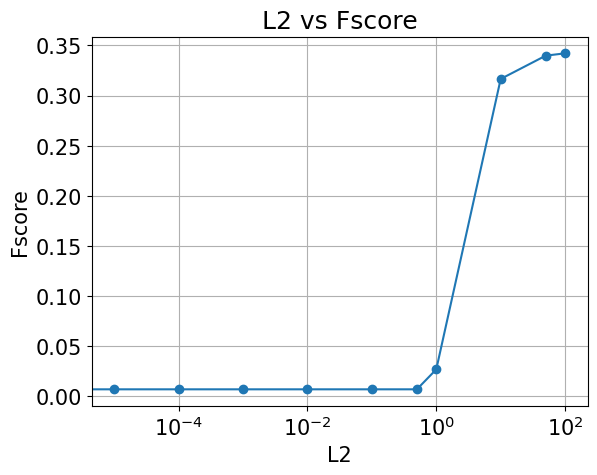

Best L2:  100
===== MÉTRICAS =====
 Accuracy  Precision  Recall  F1-score  AUC-ROC  AUC-PR
 0.745902   0.428571 0.04918  0.088235 0.513661 0.48165


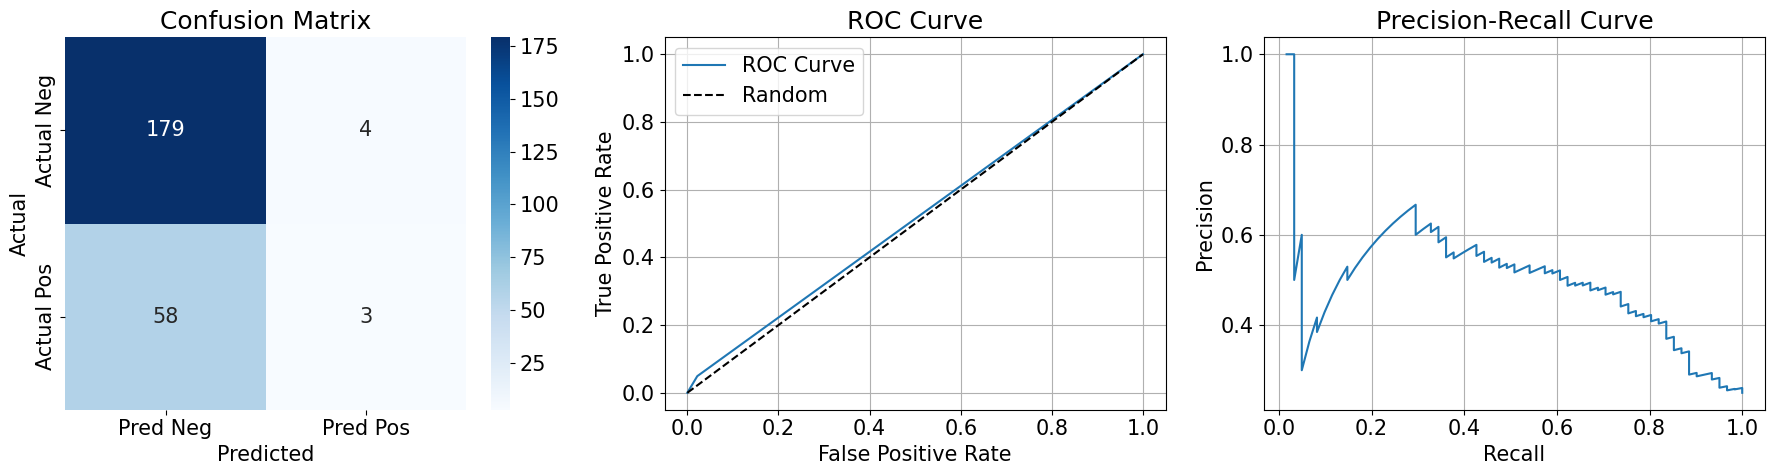

In [13]:
# sin rebalanceo
best_L2_sin_rebalanceo = pp.cross_validation_for_L2(train_data_imb, possible_L2)
print("Best L2: ", best_L2_sin_rebalanceo)

X_train_sin_rebalanceo = pp.normalization(X_train_imb)
X_val_sin_rebalanceo = pp.normalization(X_val_imb, pp.mean(X_train_imb), pp.std(X_train_imb), pp.get_bounds(X_train_imb))

model_sin_rebalanceo = mod.Logistic_Regression(X_train_sin_rebalanceo, y_train_imb, features, best_L2_sin_rebalanceo, 0.5)
model_prediciton_sin_rebalanceo = model_sin_rebalanceo.predict(X_val_sin_rebalanceo)
model_proba_sin_rebalanceo = model_sin_rebalanceo.predict_proba(X_val_sin_rebalanceo)
# print(model_sin_rebalanceo.coef)

met.get_metrics(y_val_imb, model_prediciton_sin_rebalanceo, model_proba_sin_rebalanceo)

metrics_sin_rebalanceo = met.get_numeric_metrics(y_val_imb, model_prediciton_sin_rebalanceo, model_proba_sin_rebalanceo)
metrics_for_graphing_sin_rebalanceo = met.get_metrics_for_graphing(y_val_imb, model_prediciton_sin_rebalanceo, model_proba_sin_rebalanceo)

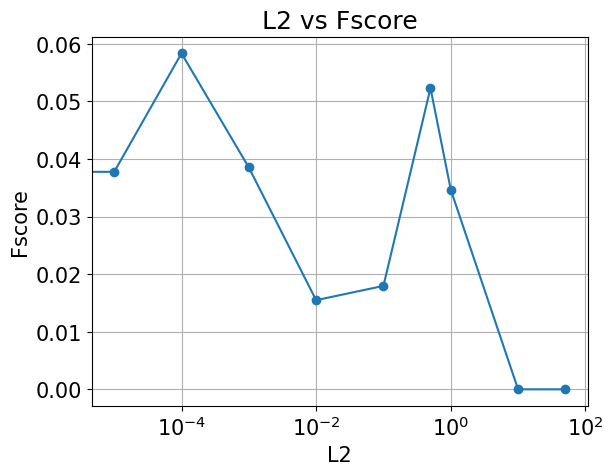

Best L2:  0.0001
===== MÉTRICAS =====
 Accuracy  Precision   Recall  F1-score  AUC-ROC   AUC-PR
 0.721311   0.470085 0.901639  0.617978 0.871361 0.605206


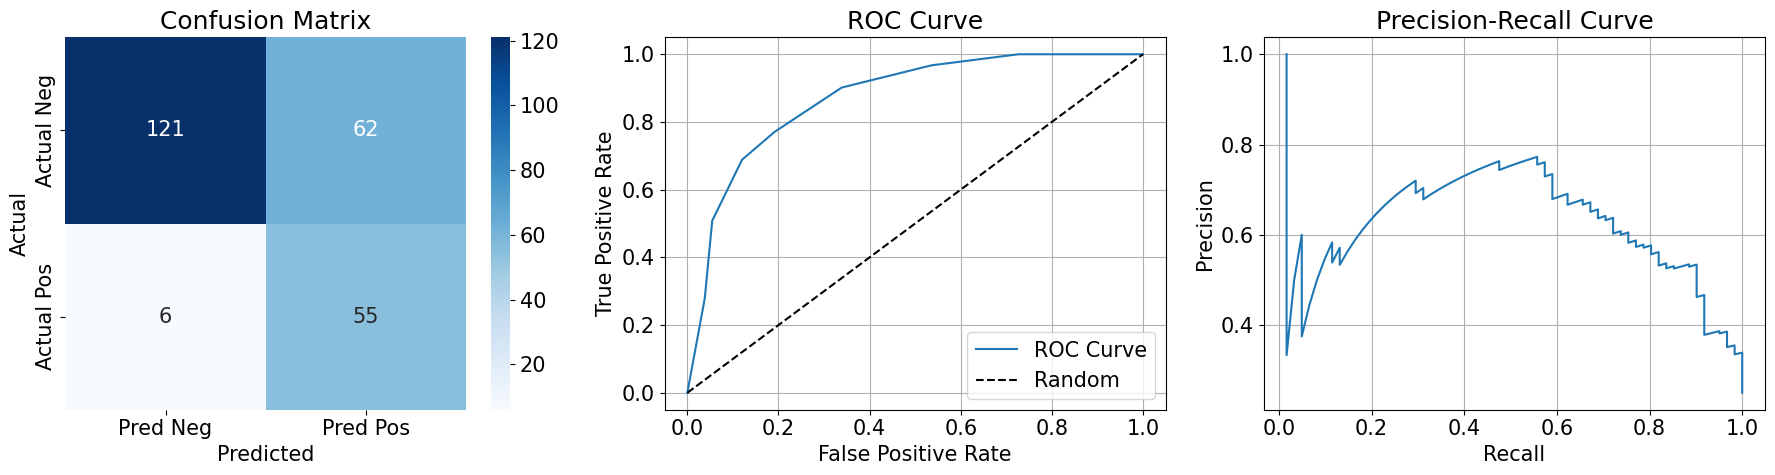

In [14]:
# Undersampling: eliminar muestras de la clase mayoritaria de manera aleatoria hasta que ambas clases tengan igual proporción.
importlib.reload(pp)
importlib.reload(met)
possible_L2 = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50]
best_L2_undersampling = pp.cross_validation_for_imbalanced(train_data_imb, possible_L2, "undersampling")
# best_L2_undersampling = 1
print("Best L2: ", best_L2_undersampling)

# hacemos undersampling a train
X_train_undersampling_bal, y_train_undersampling_bal = pp.undersampling(X_train_imb, y_train_imb)
# vemos la cantidad de 0 y 1 en y train
# print("Cantidad de 0 en y_train:", np.sum(y_train_undersampling_bal == 0))
# print("Cantidad de 1 en y_train:", np.sum(y_train_undersampling_bal == 1))
# print("total datos: ", len(y_train_undersampling_bal))
X_train_undersampling = pp.normalization(X_train_undersampling_bal)
X_val_undersampling = pp.normalization(X_val_imb, pp.mean(X_train_undersampling_bal), pp.std(X_train_undersampling_bal), pp.get_bounds(X_train_undersampling_bal))

model_undersampling = mod.Logistic_Regression(X_train_undersampling, y_train_undersampling_bal, features, best_L2_undersampling, 0.5)
model_prediction_undersamling = model_undersampling.predict(X_val_undersampling)
model_proba_undersampling = model_undersampling.predict_proba(X_val_undersampling)
# print(model_sin_rebalanceo.coef)

met.get_metrics(y_val_imb, model_prediction_undersamling, model_proba_undersampling)
# met.get_metrics(y_train_undersampling_bal, model_prediction_undersamling, model_proba_undersampling)

metrics_undersampling = met.get_numeric_metrics(y_val_imb, model_prediction_undersamling, model_proba_undersampling)
metrics_for_graphing_undersampling = met.get_metrics_for_graphing(y_val_imb, model_prediction_undersamling, model_proba_undersampling)

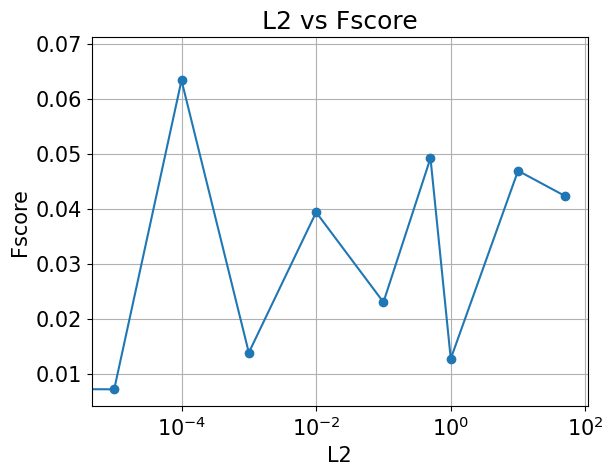

Best L2:  0
===== MÉTRICAS =====
 Accuracy  Precision  Recall  F1-score  AUC-ROC   AUC-PR
 0.717213   0.467742 0.95082  0.627027 0.888874 0.615022


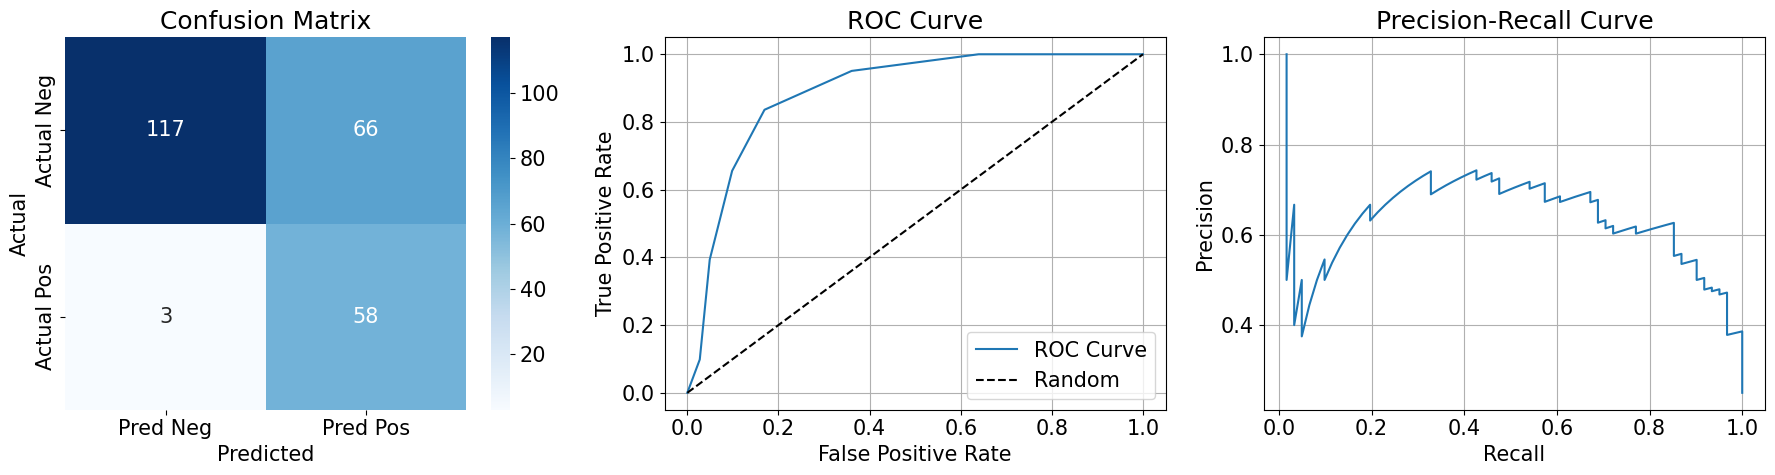

In [15]:
# Oversampling mediante duplicación: duplicar muestras de la clase minoritaria de manera aleatoria, hasta que que ambas clases tengan igual proporciónimportlib.reload(pp)
importlib.reload(pp)
possible_L2 = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50]
best_L2_oversampling_dup = pp.cross_validation_for_imbalanced(train_data_imb, possible_L2, "oversampling mediante duplicación")
print("Best L2: ", best_L2_oversampling_dup)

# hacemos oversampling a train
X_train_oversampling_dup_bal, y_train_oversampling_dup_bal = pp.oversampling_duplication(X_train_imb, y_train_imb)

X_train_oversampling_dup = pp.normalization(X_train_oversampling_dup_bal)
X_val_oversampling_dup = pp.normalization(X_val_imb, pp.mean(X_train_oversampling_dup_bal), pp.std(X_train_oversampling_dup_bal), pp.get_bounds(X_train_oversampling_dup_bal))

model_oversampling_dup = mod.Logistic_Regression(X_train_oversampling_dup, y_train_oversampling_dup_bal, features, best_L2_oversampling_dup, 0.5)
model_prediction_oversampling_dup = model_oversampling_dup.predict(X_val_oversampling_dup)
model_proba_oversampling_dup = model_oversampling_dup.predict_proba(X_val_oversampling_dup)
# print(model_sin_rebalanceo.coef)

met.get_metrics(y_val_imb, model_prediction_oversampling_dup, model_proba_oversampling_dup)

metrics_oversampling_dup = met.get_numeric_metrics(y_val_imb, model_prediction_oversampling_dup, model_proba_oversampling_dup)
metrics_for_graphing_oversampling_dup = met.get_metrics_for_graphing(y_val_imb, model_prediction_oversampling_dup, model_proba_oversampling_dup)

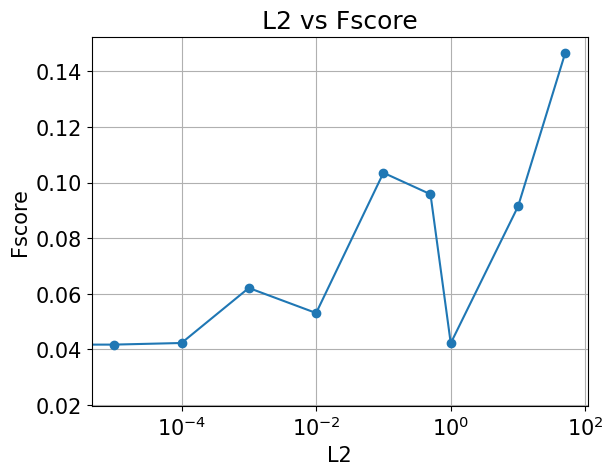

Best L2:  50
===== MÉTRICAS =====
 Accuracy  Precision   Recall  F1-score  AUC-ROC   AUC-PR
 0.733607   0.480392 0.803279  0.601227 0.756831 0.569165


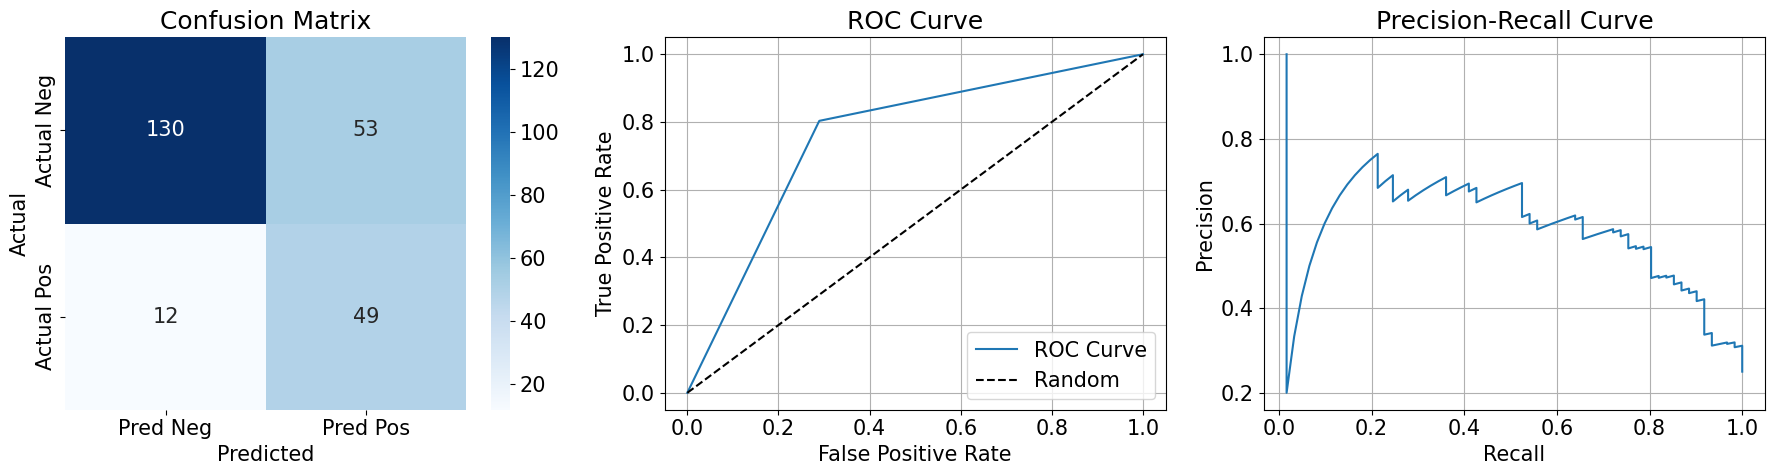

In [16]:
# Oversampling mediante SMOTE (Synthetic Minority Oversampling Technique):hasta que ambas clases tengan igual proporción.
# Oversampling mediante duplicación: duplicar muestras de la clase minoritaria de manera aleatoria, hasta que que ambas clases tengan igual proporciónimportlib.reload(pp)
importlib.reload(pp)
possible_L2 = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50]
best_L2_SMOTE = pp.cross_validation_for_imbalanced(train_data_imb, possible_L2, "oversampling mediante SMOTE")
print("Best L2: ", best_L2_SMOTE)

# hacemos oversampling a train
X_train_SMOTE_bal, y_train_SMOTE_bal = pp.oversampling_SMOTE(X_train_imb, y_train_imb)

X_train_SMOTE = pp.normalization(X_train_SMOTE_bal)
X_val_SMOTE = pp.normalization(X_val_imb, pp.mean(X_train_SMOTE_bal), pp.std(X_train_SMOTE_bal), pp.get_bounds(X_train_SMOTE_bal))

model_SMOTE = mod.Logistic_Regression(X_train_SMOTE, y_train_SMOTE_bal, features, best_L2_SMOTE, 0.5)
model_prediction_SMOTE = model_SMOTE.predict(X_val_SMOTE)
model_proba_SMOTE = model_SMOTE.predict_proba(X_val_SMOTE)
# print(model_sin_rebalanceo.coef)

met.get_metrics(y_val_imb, model_prediction_SMOTE, model_proba_SMOTE)

metrics_SMOTE = met.get_numeric_metrics(y_val_imb, model_prediction_SMOTE, model_proba_SMOTE)
metrics_for_graphing_SMOTE = met.get_metrics_for_graphing(y_val_imb, model_prediction_SMOTE, model_proba_SMOTE)

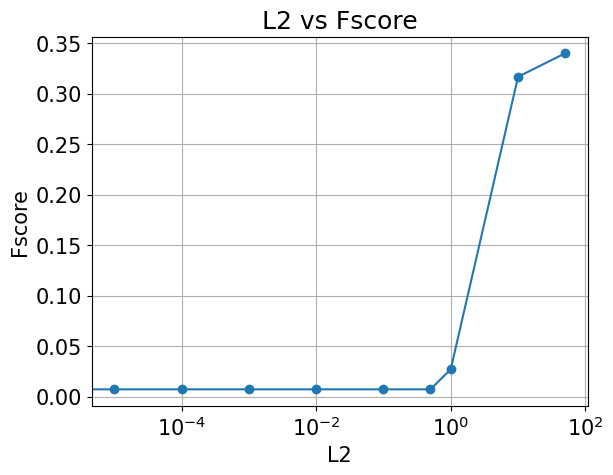

Best L2:  50
===== MÉTRICAS =====
 Accuracy  Precision   Recall  F1-score  AUC-ROC  AUC-PR
 0.790984   0.553191 0.852459  0.670968 0.811475 0.59813


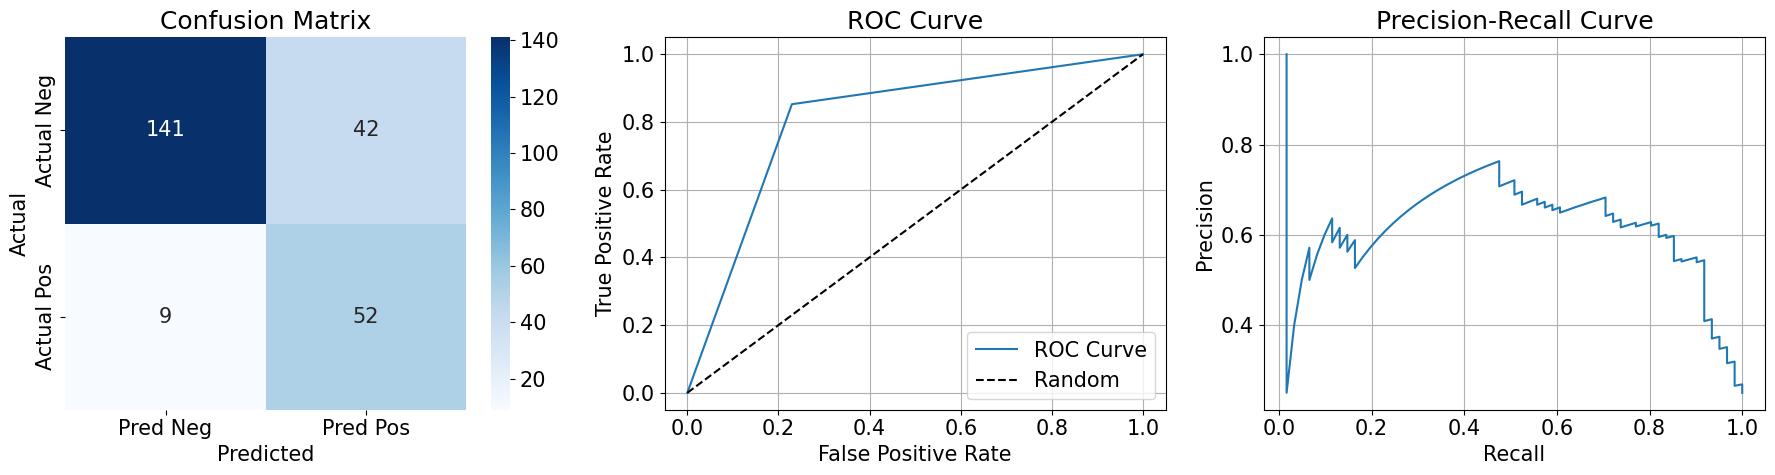

In [17]:
# Cost re weighing
importlib.reload(pp)
possible_L2 = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50]
best_L2_cost_rw = pp.cross_validation_for_imbalanced(train_data_imb, possible_L2, "oversampling mediante cost re-weighing")
print("Best L2: ", best_L2_cost_rw)

# hacemos oversampling a train
X_train_cost_rw_bal, y_train_cost_rw_bal = pp.oversampling_SMOTE(X_train_imb, y_train_imb)

X_train_cost_rw = pp.normalization(X_train_cost_rw_bal)
X_val_cost_rw = pp.normalization(X_val_imb, pp.mean(X_train_cost_rw_bal), pp.std(X_train_cost_rw_bal), pp.get_bounds(X_train_cost_rw_bal))

model_cost_rw = mod.Logistic_Regression(X_train_cost_rw, y_train_cost_rw_bal, features, best_L2_cost_rw, 0.5)
model_prediction_cost_rw = model_cost_rw.predict(X_val_cost_rw)
model_proba_cost_rw = model_cost_rw.predict_proba(X_val_cost_rw)
# print(model_sin_rebalanceo.coef)

met.get_metrics(y_val_imb, model_prediction_cost_rw, model_proba_cost_rw)

metrics_cost_rw = met.get_numeric_metrics(y_val_imb, model_prediction_cost_rw, model_proba_cost_rw)
metrics_for_graphing_cost_rw= met.get_metrics_for_graphing(y_val_imb, model_prediction_cost_rw, model_proba_cost_rw)

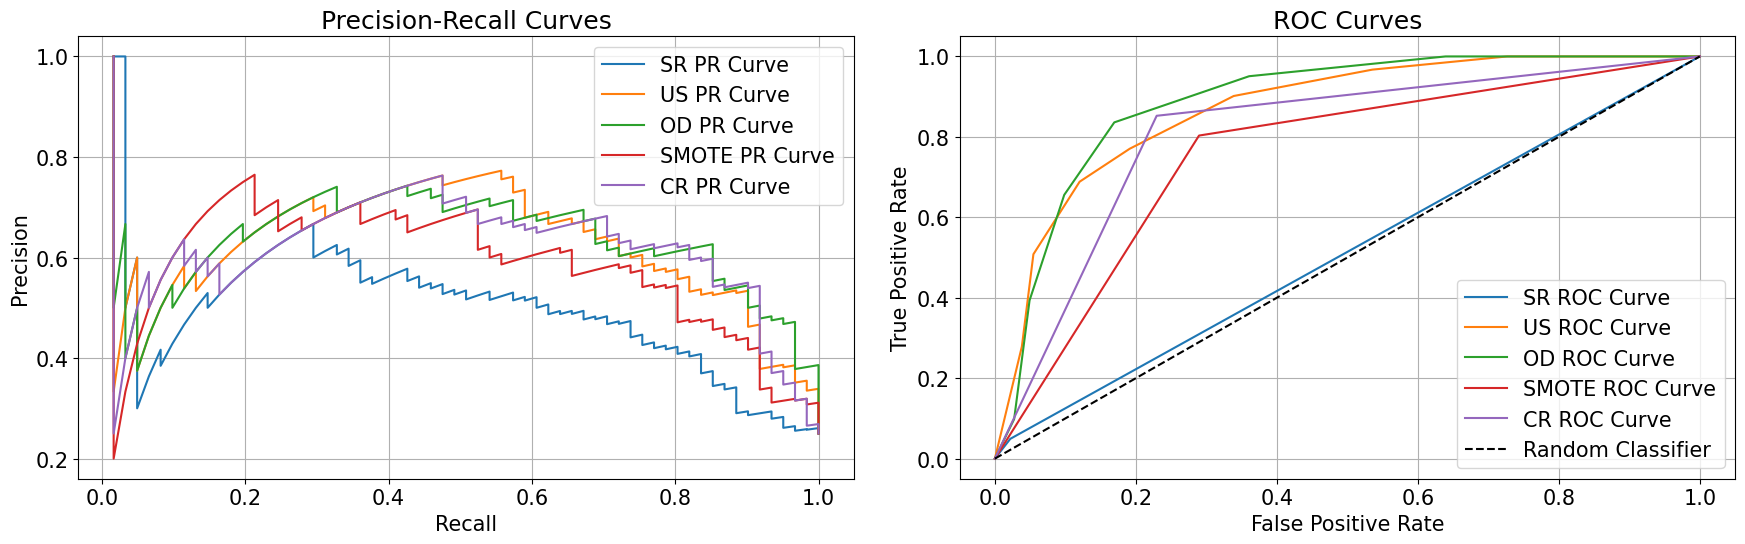

,Accuracy,Precision,Recall,F1-score,AUC-ROC,AUC-PR
SR,0.745902,0.428571,0.049180,0.088235,0.513661,0.481650
US,0.721311,0.470085,0.901639,0.617978,0.871361,0.605206
OD,0.717213,0.467742,0.950820,0.627027,0.888874,0.615022
SMOTE,0.733607,0.480392,0.803279,0.601227,0.756831,0.569165
CR,0.790984,0.553191,0.852459,0.670968,0.811475,0.598130


In [18]:
# todas juntas
importlib.reload(met)

met.graph_all_metrics_rebalanced(
    metrics_sin_rebalanceo,
    metrics_undersampling,
    metrics_oversampling_dup,
    metrics_SMOTE,
    metrics_cost_rw,
    metrics_for_graphing_sin_rebalanceo,
    metrics_for_graphing_undersampling,
    metrics_for_graphing_oversampling_dup,
    metrics_for_graphing_SMOTE,
    metrics_for_graphing_cost_rw
)

### Ejercicio 1.5
Utilizando el conjunto de datos de test cell_diagnosis_imbalanced_test.csv evalue la performance de cada uno de los modelos desarrollados anteriormente computando las métricas del inciso 1.4.

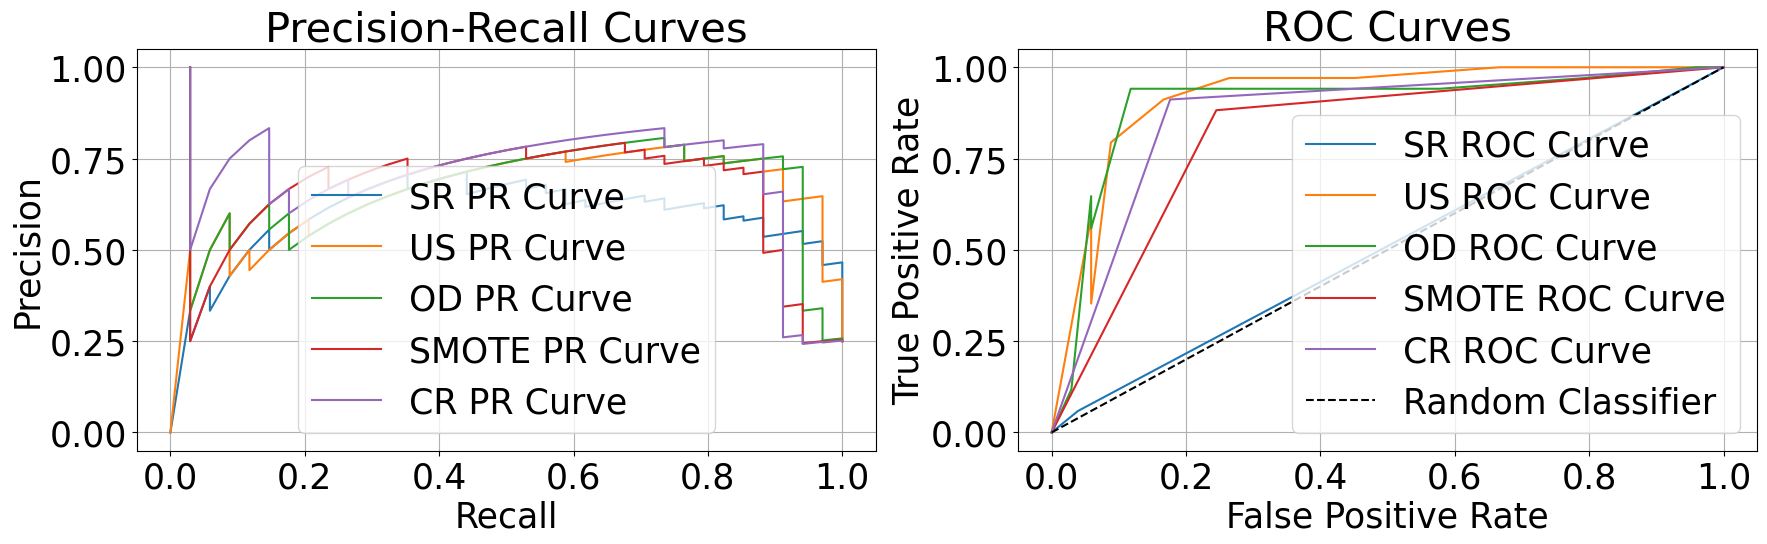

,Accuracy,Precision,Recall,F1-score,AUC-ROC,AUC-PR
SR,0.735294,0.333333,0.058824,0.100000,0.509804,0.585313
US,0.794118,0.550000,0.970588,0.702128,0.919983,0.649254
OD,0.779412,0.533333,0.941176,0.680851,0.900375,0.641794
SMOTE,0.786765,0.545455,0.882353,0.674157,0.818627,0.637338
CR,0.845588,0.632653,0.911765,0.746988,0.867647,0.677053


In [19]:
importlib.reload(met)
importlib.reload(pp)
importlib.reload(mod)

# cell_diagnosis_test_ = pp.prepare_df_test(cell_diagnosis_test, new_df_dev)
# X_test, y_test, features = pp.df_breakDown(cell_diagnosis_test_, y='Diagnosis')

cell_diagnosis_test_imbalanced_ = pp.prepare_df_test(cell_diagnosis_test_imbalanced, new_df_dev_imbalanced)
X_test_imb, y_test_imb, features = pp.df_breakDown(cell_diagnosis_test_imbalanced_, y='Diagnosis')

# sin rebalanceo
cell_diagnosis_test_imbalanced_sr = pp.normalization(X_test_imb, pp.mean(X_train_imb), pp.std(X_train_imb), pp.get_bounds(X_train_imb))
pred_sin_rebalanceo_test = model_sin_rebalanceo.predict(cell_diagnosis_test_imbalanced_sr)
proba_sin_rebalanceo_test = model_sin_rebalanceo.predict_proba(cell_diagnosis_test_imbalanced_sr)

metrics_sin_rebalanceo_test = met.get_numeric_metrics(y_test_imb, pred_sin_rebalanceo_test, proba_sin_rebalanceo_test)
metrics_for_graphing_sin_rebalanceo_test = met.get_metrics_for_graphing(y_test_imb, pred_sin_rebalanceo_test, proba_sin_rebalanceo_test)

# Undersampling
cell_diagnosis_test_imbalanced_und = pp.normalization(X_test_imb, pp.mean(X_train_undersampling_bal), pp.std(X_train_undersampling_bal), pp.get_bounds(X_train_undersampling_bal))
pred_undersampling_test = model_undersampling.predict(cell_diagnosis_test_imbalanced_und)
proba_undersampling_test = model_undersampling.predict_proba(cell_diagnosis_test_imbalanced_und)

metrics_undersampling_test = met.get_numeric_metrics(y_test_imb, pred_undersampling_test, proba_undersampling_test)
metrics_for_graphing_undersampling_test = met.get_metrics_for_graphing(y_test_imb, pred_undersampling_test, proba_undersampling_test)

# Oversampling mediante duplicación
cell_diagnosis_test_imbalanced_oversampling_dup = pp.normalization(X_test_imb, pp.mean(X_train_oversampling_dup_bal), pp.std(X_train_oversampling_dup_bal), pp.get_bounds(X_train_oversampling_dup_bal))
pred_oversampling_dup_test = model_oversampling_dup.predict(cell_diagnosis_test_imbalanced_oversampling_dup)
proba_oversampling_dup_test = model_oversampling_dup.predict_proba(cell_diagnosis_test_imbalanced_oversampling_dup)

metrics_oversampling_dup_test = met.get_numeric_metrics(y_test_imb, pred_oversampling_dup_test, proba_oversampling_dup_test)
metrics_for_graphing_oversampling_dup_test = met.get_metrics_for_graphing(y_test_imb, pred_oversampling_dup_test, proba_oversampling_dup_test)

# Oversampling mediante SMOTE
cell_diagnosis_test_imbalanced_SMOTE = pp.normalization(X_test_imb, pp.mean(X_train_SMOTE_bal), pp.std(X_train_SMOTE_bal), pp.get_bounds(X_train_SMOTE_bal))
pred_SMOTE_test = model_SMOTE.predict(cell_diagnosis_test_imbalanced_SMOTE)
proba_SMOTE_test = model_SMOTE.predict_proba(cell_diagnosis_test_imbalanced_SMOTE)

metrics_SMOTE_test = met.get_numeric_metrics(y_test_imb, pred_SMOTE_test, proba_SMOTE_test)
metrics_for_graphing_SMOTE_test = met.get_metrics_for_graphing(y_test_imb, pred_SMOTE_test, proba_SMOTE_test)

# Cost re weighing
cell_diagnosis_test_imbalanced_cost_rw = pp.normalization(X_test_imb, pp.mean(X_train_cost_rw_bal), pp.std(X_train_cost_rw_bal), pp.get_bounds(X_train_cost_rw_bal))
pred_cost_rw_test = model_cost_rw.predict(cell_diagnosis_test_imbalanced_cost_rw)
proba_cost_rw_test = model_cost_rw.predict_proba(cell_diagnosis_test_imbalanced_cost_rw)

metrics_cost_rw_test = met.get_numeric_metrics(y_test_imb, pred_cost_rw_test, proba_cost_rw_test)
metrics_for_graphing_cost_rw_test = met.get_metrics_for_graphing(y_test_imb, pred_cost_rw_test, proba_cost_rw_test)

# todas juntas
met.graph_all_metrics_rebalanced(
    metrics_sin_rebalanceo_test,
    metrics_undersampling_test,
    metrics_oversampling_dup_test,
    metrics_SMOTE_test,
    metrics_cost_rw_test,
    metrics_for_graphing_sin_rebalanceo_test,
    metrics_for_graphing_undersampling_test,
    metrics_for_graphing_oversampling_dup_test,
    metrics_for_graphing_SMOTE_test,
    metrics_for_graphing_cost_rw_test
)


# Ejercicio 2: Predicción de Rendimiento de Jugadores de Basketball

Los archivos WAR_class_dev.csv y WAR_class_test.csv tienen los datos de distintos jugadores de basketball recopilados a lo largo de varias temporadas. Los features indican diversas métricas individuales para cada jugador. La variable objetivo es WAR_class, donde WAR son las siglas de una métrica llamada Wins Above Replacement (“Victorias Por Encima de Suplencias”), que mide el impacto de un jugador en términos de partidos ganados por encima de lo que aportaría un jugador suplente promedio.

El objetivo es desarrollar distintos modelos predictivos para estimar la probabilidad de que un jugador pertenezca a una de las tres clases definidas en la columna war_class: Negative WAR, Null WAR o Positive WAR, que corresponden a las clases 1, 2 y 3 respectivamente.

El resto de las features presentes están explicadas en el archivo WAR_class.md.

### Ejercicio 2.1
Conducir un análisis exploratorio sobre los datos en WAR_class_dev.csv. Visualice la distribución de las variables y de la variable objetivo. Verifique si hay valores faltantes (NaN), datos duplicados o desbalanceo entre clases. Analice también la posible presencia de correlaciones fuertes entre los features. (Pandas Cheat Sheet)

In [20]:
WAR_class_dev = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema2/data/raw/WAR_class_dev.csv')
WAR_class_test = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema2/data/raw/WAR_class_test.csv')

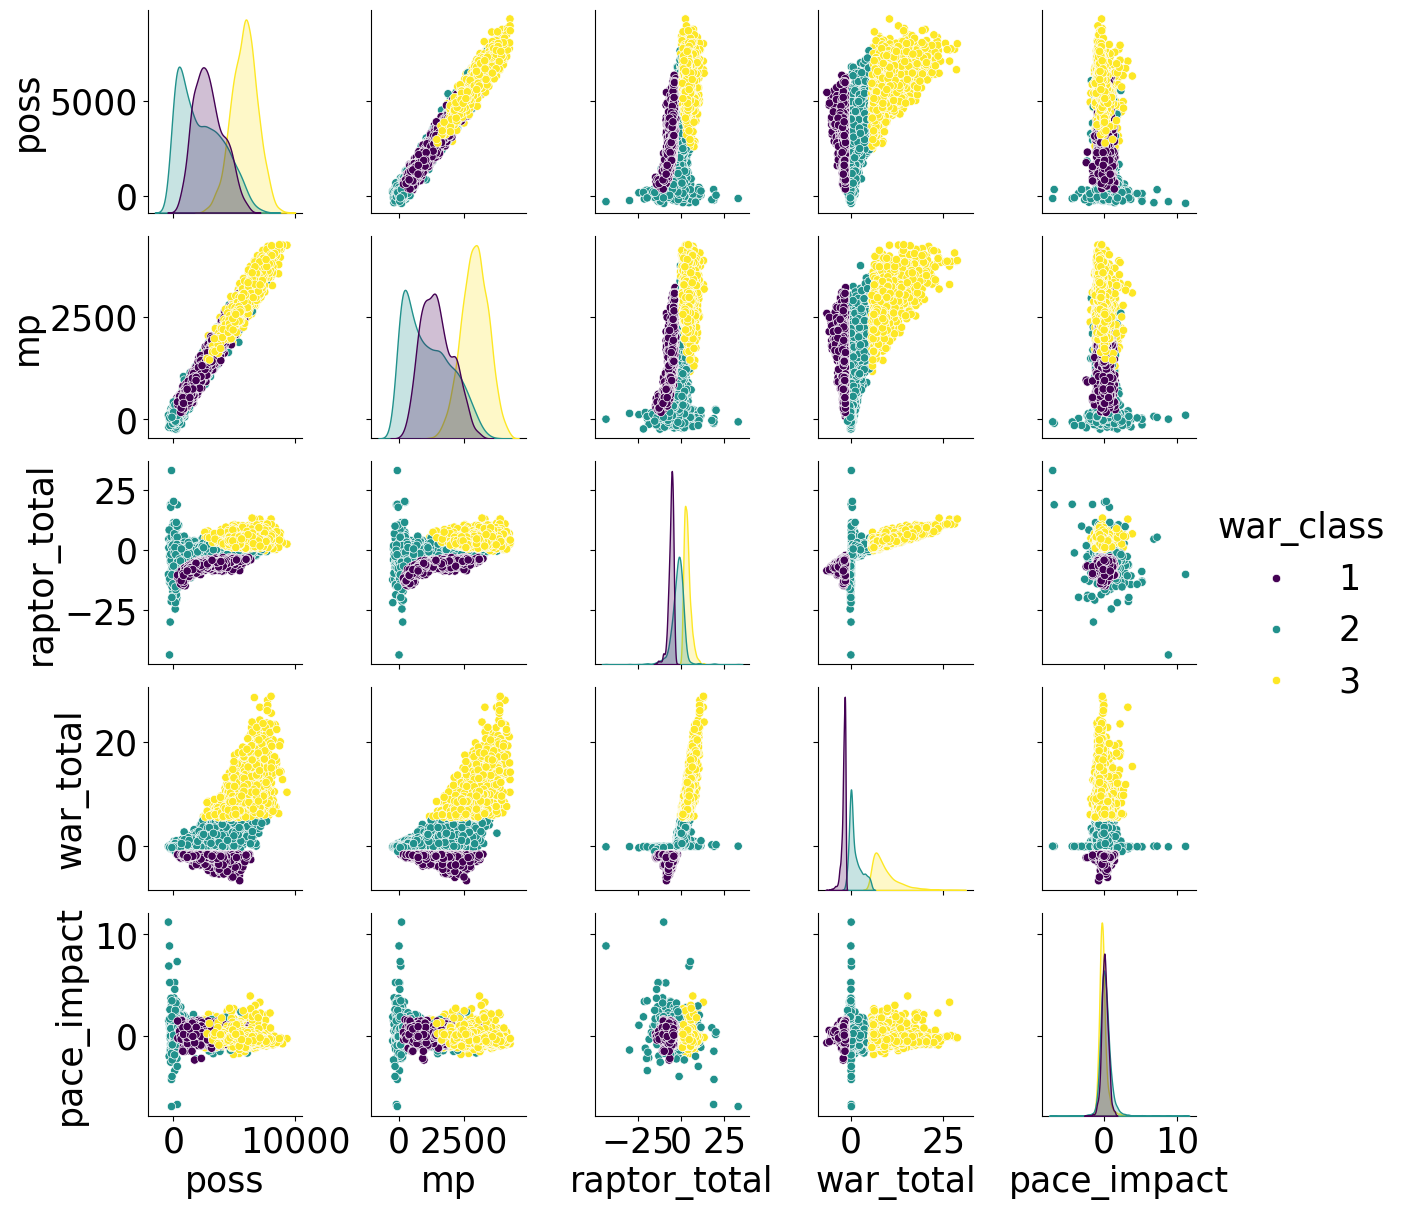

                  poss        mp  raptor_total  war_total  pace_impact  \
poss          1.000000  0.984420      0.641996   0.719457    -0.335821   
mp            0.984420  1.000000      0.646959   0.726412    -0.341906   
raptor_total  0.641996  0.646959      1.000000   0.854540    -0.257449   
war_total     0.719457  0.726412      0.854540   1.000000    -0.215636   
pace_impact  -0.335821 -0.341906     -0.257449  -0.215636     1.000000   
war_class     0.564286  0.567405      0.810724   0.865727    -0.168358   

              war_class  
poss           0.564286  
mp             0.567405  
raptor_total   0.810724  
war_total      0.865727  
pace_impact   -0.168358  
war_class      1.000000  


In [21]:
# hacemos un pairplot
sns.pairplot(WAR_class_dev, hue='war_class', palette='viridis')
# plt.title('Pairplot of WAR Class Dataset')
plt.show()

correlaciones = WAR_class_dev.corr(numeric_only=True)
print(correlaciones)


In [22]:
sys.path.append(os.path.abspath('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema2/src'))
import preprocessing2 as pp2
importlib.reload(pp2)
import models2 as mod2
importlib.reload(mod2)
import metrics2 as met2
importlib.reload(met2)

<module 'metrics2' from 'c:\\Users\\felic\\OneDrive\\Documentos\\GitHub\\MLyDL_TPs\\Marolda_Felicitas_TP2\\Problema2\\src\\metrics2.py'>

In [23]:
importlib.reload(pp2)

war_dev = pp2.prepare_df(WAR_class_dev)
war_dev = pp2.feature_engineering(war_dev)

### Ejercicio 2.2
Implementar las siguientes tres arquitecturas, adecuadas para la tarea de clasificación:
1) Análisis discriminante lineal (Linear Discriminant Analysis, LDA).
2) Regresión logística multi-clase. Recuerde que puede agregar regularización.
3) Bosque aleatorio (Random Forest) utilizando la entropía como criterio de división.

Se recomienda experimentar con diferentes configuraciones de hiperparámetros (número de árboles, profundidad máxima, etc.). Luego, se podrá seleccionar la mejor combinación en función de los resultados obtenidos.

In [24]:
importlib.reload(pp2)
train_data_war, val_data_war = pp2.split_data(war_dev, 0.2)

X_train_war, y_train_war, features = pp2.df_breakDown(train_data_war, 'war_class')

X_val_war, y_val_war, _ = pp2.df_breakDown(val_data_war, 'war_class')
print("Cantidad de 1 en y_val_war:", np.sum(y_val_war == 1))
print("Cantidad de 2 en y_val_war:", np.sum(y_val_war == 2))
print("Cantidad de 3 en y_val_war:", np.sum(y_val_war == 3))

print("Cantidad de 1 en y_train:", np.sum(y_train_war == 1))
print("Cantidad de 2 en y_train:", np.sum(y_train_war == 2))
print("Cantidad de 3 en y_train:", np.sum(y_train_war == 3))
# balanceamos train con undersampling
X_train_war_bal_, y_train_war_bal = pp2.undersampling(X_train_war, y_train_war)

# contamos cuantas de cada clase hay en y_trian_bal
print("Cantidad de 1 en y_train_bal:", np.sum(y_train_war_bal == 1))
print("Cantidad de 2 en y_train_bal:", np.sum(y_train_war_bal == 2))
print("Cantidad de 3 en y_train_bal:", np.sum(y_train_war_bal == 3))

X_train_war = pp2.normalization(X_train_war_bal_)
X_val_war = pp2.normalization(X_val_war, pp2.median(X_train_war_bal_), pp2.std(X_train_war_bal_))
y_train_war = y_train_war_bal


Cantidad de 1 en y_val_war: 409
Cantidad de 2 en y_val_war: 509
Cantidad de 3 en y_val_war: 438
Cantidad de 1 en y_train: 1620
Cantidad de 2 en y_train: 2000
Cantidad de 3 en y_train: 1806
Cantidad de 1 en y_train_bal: 1620
Cantidad de 2 en y_train_bal: 1620
Cantidad de 3 en y_train_bal: 1620


self.classes: [1 2 3]
===== MÉTRICAS =====
             Metric     Value
           Accuracy  0.938053
Precision (Class 1)  0.931663
Precision (Class 2)  0.997658
Precision (Class 3)  0.891837
   Recall (Class 1)  1.000000
   Recall (Class 2)  0.836935
   Recall (Class 3)  0.997717
 F1-score (Class 1)  0.964623
 F1-score (Class 2)  0.910256
 F1-score (Class 3)  0.941810
            AUC-ROC -0.986664
             AUC-PR  0.982150


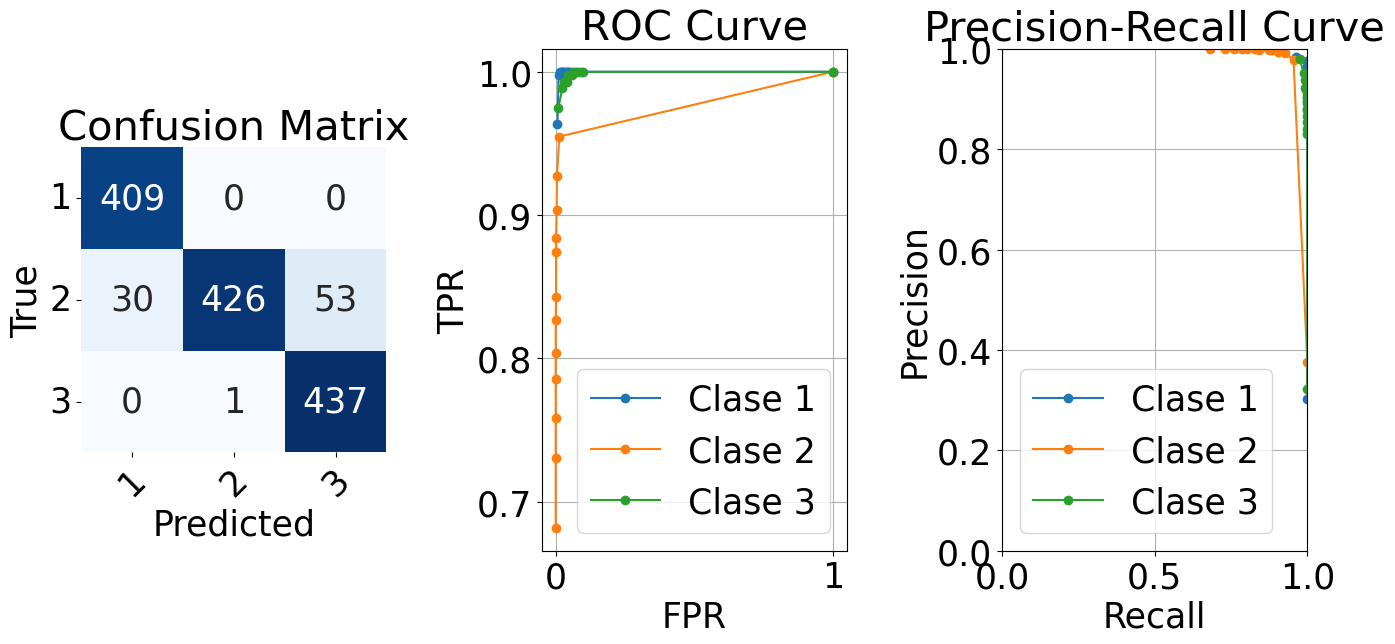

,Metric,Value
0,Accuracy,0.938053
1,Precision (Class 1),0.931663
2,Precision (Class 2),0.997658
3,Precision (Class 3),0.891837
4,Recall (Class 1),1.000000
5,Recall (Class 2),0.836935
6,Recall (Class 3),0.997717
7,F1-score (Class 1),0.964623
8,F1-score (Class 2),0.910256
9,F1-score (Class 3),0.941810


In [25]:
# LDA búsqueda de hiperparámetros
importlib.reload(pp2)
importlib.reload(mod2)
importlib.reload(met2)
model_LDA = mod2.LDAClassifier(X_train_war, y_train_war, features)
model_LDA_proba = model_LDA.predict_proba(X_val_war)
model_prediction_LDA = model_LDA.predict(X_val_war)

thresholds_lda = np.arange(0, 1.01, 0.08)
met2.get_metrics_multiclass(y_val_war, model_prediction_LDA, model_LDA_proba, thresholds_lda, thresholds_lda)

Fscore: [0.         0.09326425 0.53793103]
Fscore: [0.         0.08450704 0.49137931]
Fscore: [0.         0.08733624 0.49213162]
Fscore: [0.         0.07329843 0.53972603]
Fscore: [0.         0.07511737 0.46715328]
Fscore: [0.         0.04761905 0.5       ]
Fscore: [0.        0.12      0.5252809]
Fscore: [0.         0.10526316 0.51768034]
Fscore: [0.         0.08490566 0.50704225]
Fscore: [0.         0.09090909 0.51332398]
Fscore: [0.         0.09326425 0.53793103]
Fscore: [0.         0.08450704 0.49137931]
Fscore: [0.         0.09565217 0.49213162]
Fscore: [0.         0.07329843 0.53972603]
Fscore: [0.         0.07511737 0.46715328]
Fscore: [0.         0.04761905 0.5       ]
Fscore: [0.        0.12      0.5252809]
Fscore: [0.         0.10526316 0.51768034]
Fscore: [0.         0.08490566 0.50704225]
Fscore: [0.         0.09090909 0.51332398]
Fscore: [0.         0.09326425 0.53793103]
Fscore: [0.         0.08450704 0.49137931]
Fscore: [0.         0.09565217 0.49213162]
Fscore: [0.      

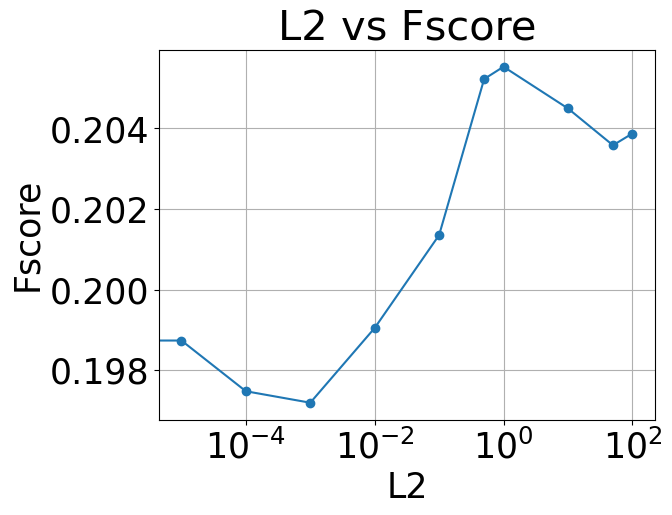

Best L2:  1
===== MÉTRICAS =====
             Metric     Value
           Accuracy  0.829646
Precision (Class 1)  0.836478
Precision (Class 2)  1.000000
Precision (Class 3)  0.741117
   Recall (Class 1)  0.975550
   Recall (Class 2)  0.565815
   Recall (Class 3)  1.000000
 F1-score (Class 1)  0.900677
 F1-score (Class 2)  0.722710
 F1-score (Class 3)  0.851312
            AUC-ROC -0.872136
             AUC-PR  0.714686


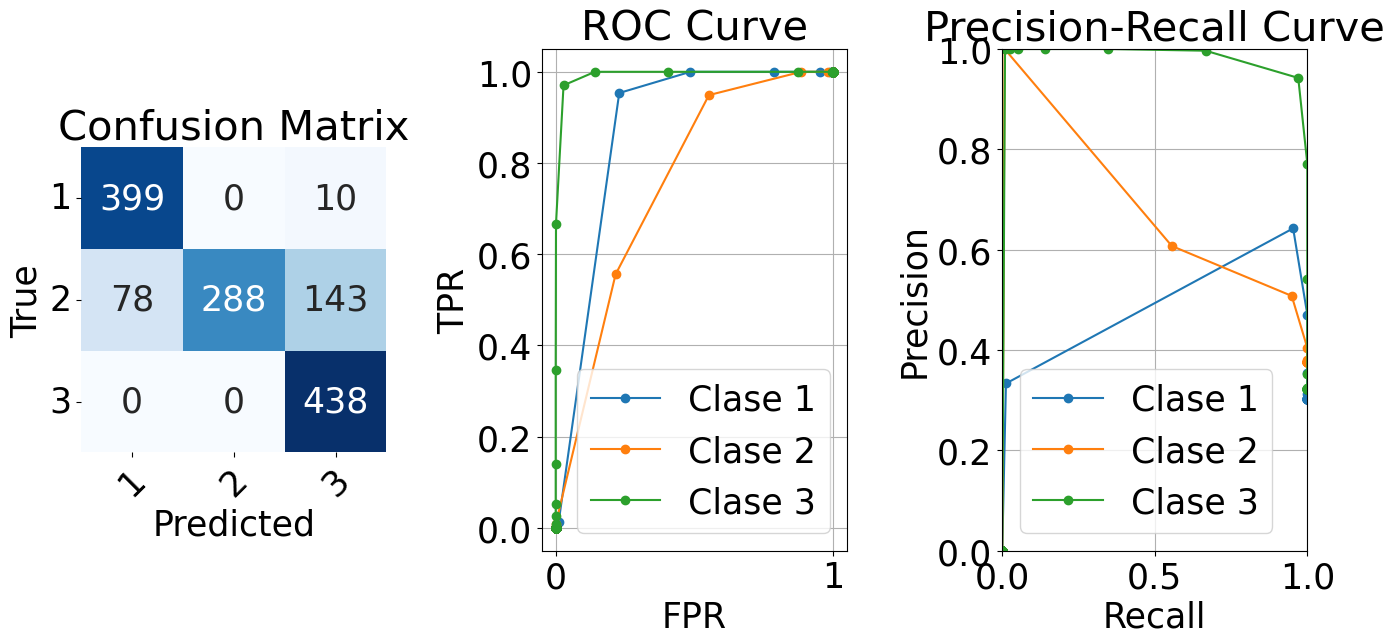

,Metric,Value
0,Accuracy,0.829646
1,Precision (Class 1),0.836478
2,Precision (Class 2),1.000000
3,Precision (Class 3),0.741117
4,Recall (Class 1),0.975550
5,Recall (Class 2),0.565815
6,Recall (Class 3),1.000000
7,F1-score (Class 1),0.900677
8,F1-score (Class 2),0.722710
9,F1-score (Class 3),0.851312


In [26]:
# Búsqueda de hiperparámetros para Logistic Regression Multiclass
importlib.reload(pp2)
importlib.reload(mod2)
importlib.reload(met2)
possible_L2 = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100]
best_L2_multiclass = pp2.cross_validation_for_LogisticReg(train_data_war, possible_L2)
print("Best L2: ", best_L2_multiclass)
best_L2_multiclass = 50

model_multiclass = mod2.Logistic_Regression_Multiclass(X_train_war, y_train_war, features, best_L2_multiclass, 0.5)
model_proba_multiclass = model_multiclass.predict_proba(X_val_war)
model_prediction_multiclass = model_multiclass.predict(X_val_war)

thresholds_log = np.linspace(0, 1, 150)
met2.get_metrics_multiclass(y_val_war, model_prediction_multiclass, model_proba_multiclass, thresholds_log, thresholds_log)

Testing n_trees=1
Fscore: [0.93142857 0.18719212 0.73446328]
Fscore: [0.91008174 0.6557377  0.82524272]
Fscore: [0.90419162 0.63975155 0.80373832]
Fscore: [0.90449438 0.36444444 0.7833002 ]
Fscore: [0.90537084 0.64686469 0.82051282]
Fscore: [0.88826816 0.61016949 0.82598608]
Fscore: [0.9076087  0.59701493 0.83482143]
Fscore: [0.81108312 0.42857143 0.84137931]
Fscore: [0.88826816 0.60958904 0.82949309]
Fscore: [0.71428571 0.25726141 0.86935867]
Testing n_trees=5
Fscore: [0.93142857 0.64705882 0.84415584]
Fscore: [0.9076087  0.6122449  0.81042654]
Fscore: [0.90419162 0.63975155 0.80373832]
Fscore: [0.90704225 0.65693431 0.86593407]
Fscore: [0.90537084 0.64686469 0.82051282]
Fscore: [0.88826816 0.61016949 0.82598608]
Fscore: [0.91008174 0.64748201 0.85193622]
Fscore: [0.90196078 0.63917526 0.83944954]
Fscore: [0.88579387 0.604811   0.82949309]
Fscore: [0.92261905 0.6407767  0.81152993]
Testing n_trees=10
Fscore: [0.93142857 0.64705882 0.84415584]
Fscore: [0.91008174 0.61694915 0.81042654]

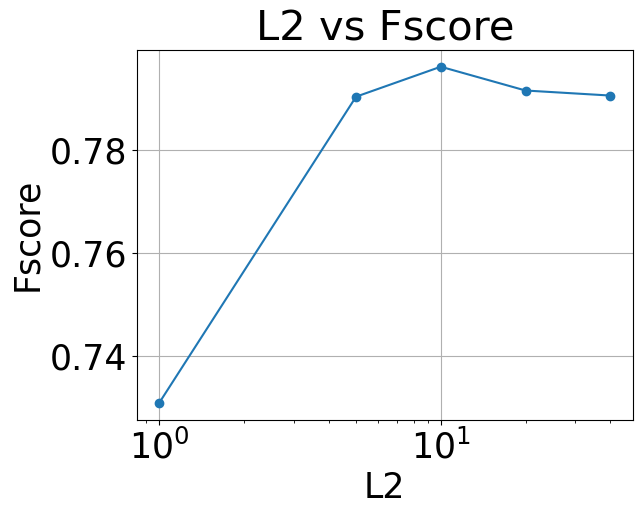

Best n_trees:  10


In [27]:
# random forest búsqueda de hiperparámetros

importlib.reload(mod2)
importlib.reload(pp2)

best_n_trees = [1, 5, 10, 20, 40]

params = {
    'n_trees': 10,
    'max_depth': 5,
    'perc_features': 0.6,
}
best_n_trees = pp2.cross_validation_for_RanfomForest(train_data_war, "n_trees", best_n_trees, params, folds=10)
print("Best n_trees: ", best_n_trees)


Testing max_depth=1
Fscore: [0.69509595 0.         0.89559165]
Fscore: [0.91008174 0.61694915 0.81042654]
Fscore: [0.70560748 0.         0.78718535]
Fscore: [0.84960422 0.65201465 0.90740741]
Fscore: [0.90537084 0.65131579 0.82262211]
Fscore: [0.88826816 0.61016949 0.82598608]
Fscore: [0.69151139 0.         0.90556901]
Fscore: [0.75058275 0.14084507 0.8280543 ]
Fscore: [0.67659574 0.         0.87591241]
Fscore: [0.92261905 0.6407767  0.81152993]
Testing max_depth=5
Fscore: [0.93142857 0.64705882 0.84415584]
Fscore: [0.91008174 0.61694915 0.81042654]
Fscore: [0.90419162 0.63975155 0.80373832]
Fscore: [0.90449438 0.65201465 0.86593407]
Fscore: [0.90537084 0.64686469 0.82051282]
Fscore: [0.88826816 0.60544218 0.82407407]
Fscore: [0.9076087  0.64259928 0.85193622]
Fscore: [0.89944134 0.63448276 0.83944954]
Fscore: [0.88826816 0.60958904 0.82949309]
Fscore: [0.92537313 0.66242038 0.81879195]
Testing max_depth=10
Fscore: [0.93142857 0.64705882 0.84415584]
Fscore: [0.91008174 0.61694915 0.810

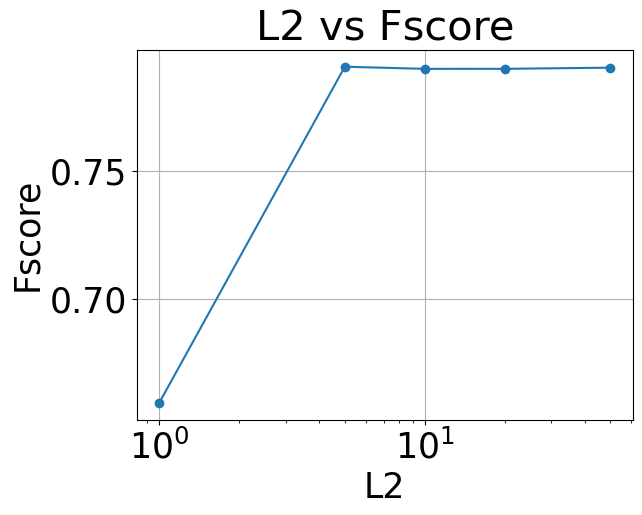

Best max_depth:  5


In [28]:
best_max_depth = [1, 5, 10, 20, 50]
params = {
    'n_trees': best_n_trees,
    'max_depth': 5,
    'perc_features': 0.6,
}

best_max_depth = pp2.cross_validation_for_RanfomForest(train_data_war, "max_depth", best_max_depth, params, folds=10)
print("Best max_depth: ", best_max_depth)
best_max_depth = 5
# cambiamos la max depth porque es muy parecida a 50 y es mejor que sea rápido "no free lunch"


Testing perc_features=0.1
Fscore: [0.         0.50688705 0.        ]
Fscore: [0.         0.54691689 0.        ]
Fscore: [0.43578644 0.         0.        ]
Fscore: [0.         0.         0.53315291]
Fscore: [0.49235049 0.         0.        ]
Fscore: [0.45363766 0.         0.        ]
Fscore: [0.         0.51506849 0.        ]
Fscore: [0.45803698 0.         0.        ]
Fscore: [0.45363766 0.         0.        ]
Fscore: [0.44096728 0.         0.        ]
Testing perc_features=0.2
Fscore: [0.82951654 0.48559671 0.87053571]
Fscore: [0.75225225 0.1369863  0.81235154]
Fscore: [0.90419162 0.7079646  0.83698297]
Fscore: [0.79310345 0.49593496 0.90740741]
Fscore: [0.80454545 0.48529412 0.85483871]
Fscore: [0.8030303  0.40466926 0.82598608]
Fscore: [0.88126649 0.63272727 0.86976744]
Fscore: [0.79900744 0.37704918 0.8375286 ]
Fscore: [0.88579387 0.72327044 0.88452088]
Fscore: [0.8401084  0.52112676 0.8261851 ]
Testing perc_features=0.3
Fscore: [0.92090395 0.72222222 0.88235294]
Fscore: [0.82469136

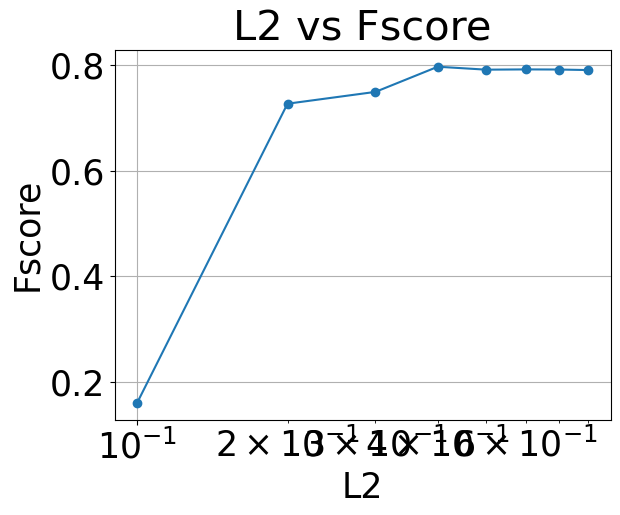

Best perc_features:  0.4


In [29]:
importlib.reload(pp2)
best_max_depth = 5

best_perc_features = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
params = {
    'n_trees': best_n_trees,
    'max_depth': best_max_depth,
    'perc_features': 0.6,
}

best_perc_features = pp2.cross_validation_for_RanfomForest(train_data_war, "perc_features", best_perc_features, params, folds=10)
print("Best perc_features: ", best_perc_features)

In [30]:
importlib.reload(mod2)
importlib.reload(pp2)
importlib.reload(met2)

WAR_class_dev = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema2/data/raw/WAR_class_dev.csv')
WAR_class_test = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema2/data/raw/WAR_class_test.csv')
war_dev = pp2.prepare_df(WAR_class_dev)
war_dev = pp2.feature_engineering(war_dev)
train_data_war, val_data_war = pp2.split_data(war_dev, 0.2)

X_train_war, y_train_war, features = pp2.df_breakDown(train_data_war, 'war_class')

X_val_war, y_val_war, _ = pp2.df_breakDown(val_data_war, 'war_class')

X_train_war_bal_, y_train_war_bal = pp2.undersampling(X_train_war, y_train_war)

X_train_war = pp2.normalization(X_train_war_bal_)
X_val_war = pp2.normalization(X_val_war, pp2.median(X_train_war_bal_), pp2.std(X_train_war_bal_))
y_train_war = y_train_war_bal


# entrenamos el modelo con los mejores hiperparametros

print("best_n_trees: ", best_n_trees)
print("best_max_depth: ", best_max_depth)
print("best_perc_features: ", best_perc_features)
print("x train: ", X_train_war.shape)
# print("y train: ", y_train_war)
random_forest = mod2.RandomForest(X_train_war, y_train_war, features, best_n_trees, best_max_depth, best_perc_features)

best_n_trees:  10
best_max_depth:  5
best_perc_features:  0.4
x train:  (4860, 9)


probabilidades:  [[1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.7 0.3]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.1 0.9]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  1.

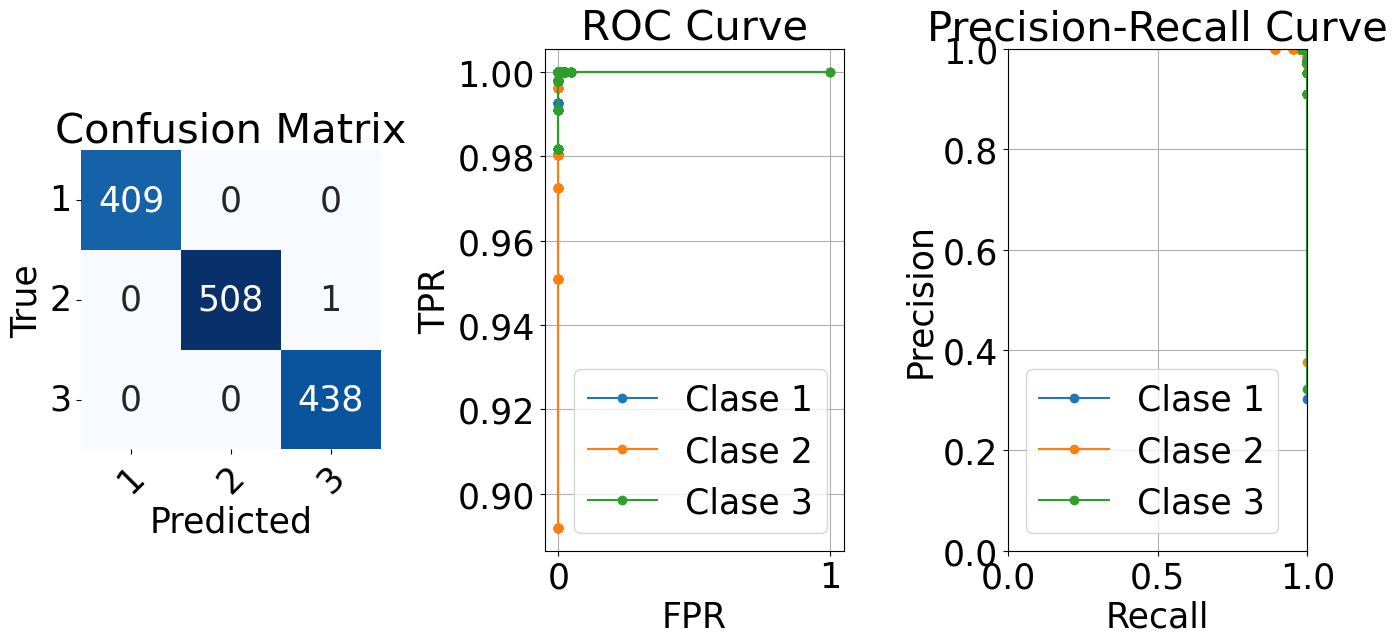

,Metric,Value
0,Accuracy,0.999263
1,Precision (Class 1),1.000000
2,Precision (Class 2),1.000000
3,Precision (Class 3),0.997722
4,Recall (Class 1),1.000000
5,Recall (Class 2),0.998035
6,Recall (Class 3),1.000000
7,F1-score (Class 1),1.000000
8,F1-score (Class 2),0.999017
9,F1-score (Class 3),0.998860


In [31]:
prediction_rf = random_forest.predict(X_val_war)
prediction_proba_rf = random_forest.predict_proba(X_val_war)
np.set_printoptions(threshold = np.inf)
# print("probabilidades: ", prediction_proba_rf)

# thresholds_rf = np.linspace(0.1, 0.9, num=9)
# thresholds_rf = np.linspace(prediction_proba_rf.min()//10, prediction_proba_rf.max()*1000000, 20)
print("probabilidades: ", prediction_proba_rf)
thresholds_rf = np.arange(0, 1.01, 0.01)
met2.get_metrics_multiclass(y_val_war, prediction_rf, prediction_proba_rf, thresholds_rf, thresholds_rf)

### Ejercicio 2.3
Utilizando el conjunto de datos de desarrollo WAR_class_dev.csv entrene los modelos mencionados en el inciso anterior. Recuerde que estos modelos, en particular LDA y regresión logística, suelen obtener mejores resultados cuando se entrenan con datos normalizados. Utilice las técnicas de reescalado y data splits que considere más apropiadas. Para cada modelo desarrollado reporte la estimación de las
siguientes métricas de performance.

WAR_class_dev.csv:
- Matriz de confusión
- Accuracy
- Precision
- Recall
- F-Score
- Curva Precision-Recall (PR)
- Curva ROC
- AUC-ROC
- AUC-PR
Presentar los resultados de manera compacta para facilitar la comparación entre los modelos

===== MÉTRICAS DE LOS TRES MODELOS =====
             Metric       LDA  Random Forest  Logistic Regression
           Accuracy  0.938053       0.999263             0.829646
Precision (Class 1)  0.931663       1.000000             0.836478
Precision (Class 2)  0.997658       1.000000             1.000000
Precision (Class 3)  0.891837       0.997722             0.741117
   Recall (Class 1)  1.000000       1.000000             0.975550
   Recall (Class 2)  0.836935       0.998035             0.565815
   Recall (Class 3)  0.997717       1.000000             1.000000
 F1-score (Class 1)  0.964623       1.000000             0.900677
 F1-score (Class 2)  0.910256       0.999017             0.722710
 F1-score (Class 3)  0.941810       0.998860             0.851312
            AUC-ROC -0.986664      -1.000000            -0.872136
             AUC-PR  0.982150       0.998684             0.714686
y true:  (1356,)
y pred:  (1356,)
y true:  (1356,)
y pred:  (1356,)


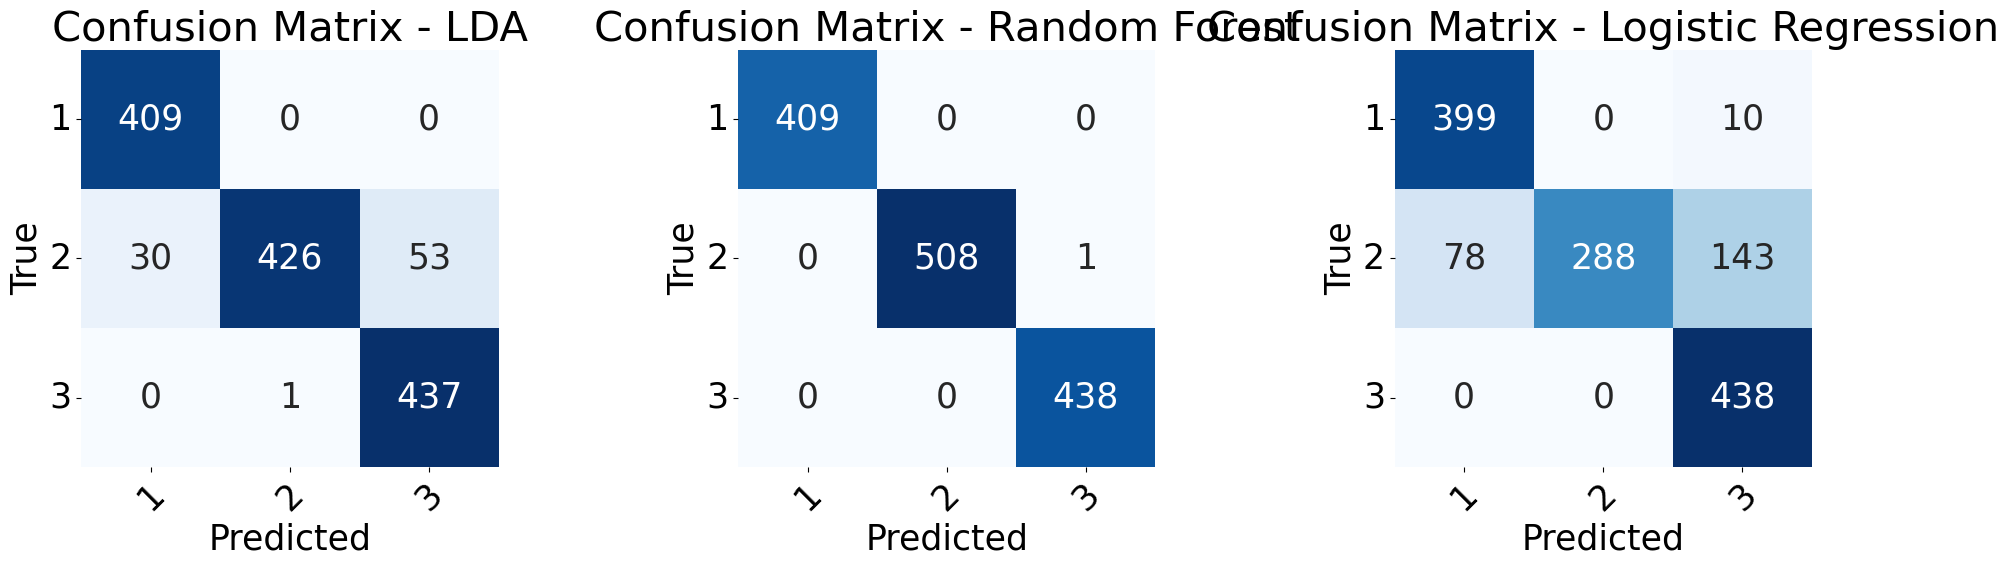

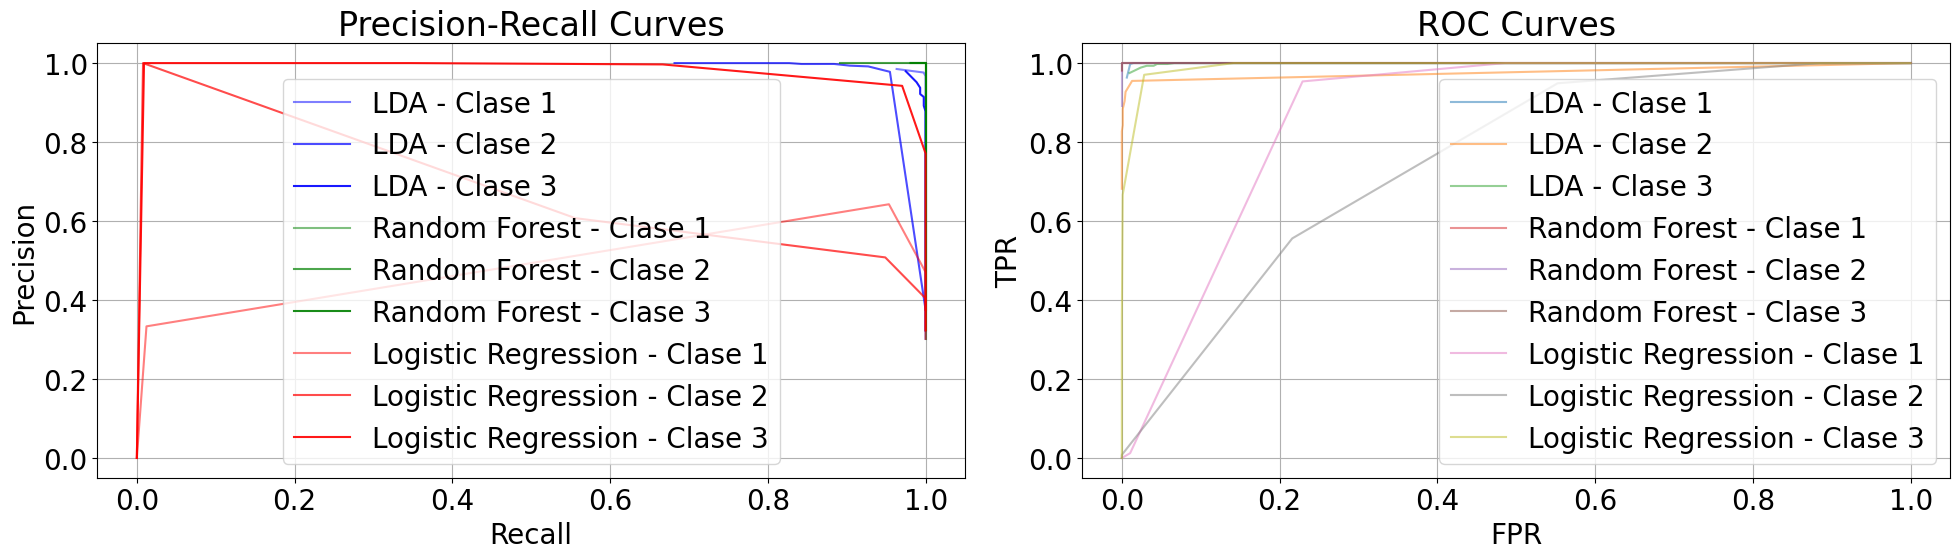

,Metric,LDA,Random Forest,Logistic Regression
0,Accuracy,0.938053,0.999263,0.829646
1,Precision (Class 1),0.931663,1.000000,0.836478
2,Precision (Class 2),0.997658,1.000000,1.000000
3,Precision (Class 3),0.891837,0.997722,0.741117
4,Recall (Class 1),1.000000,1.000000,0.975550
5,Recall (Class 2),0.836935,0.998035,0.565815
6,Recall (Class 3),0.997717,1.000000,1.000000
7,F1-score (Class 1),0.964623,1.000000,0.900677
8,F1-score (Class 2),0.910256,0.999017,0.722710
9,F1-score (Class 3),0.941810,0.998860,0.851312


In [32]:
importlib.reload(met2)
importlib.reload(pp2)
importlib.reload(mod2)

metrics_lda = met2.get_numeric_metrics_multiclass(y_val_war, model_prediction_LDA, model_LDA_proba, thresholds_lda, thresholds_lda)
metrics_rf = met2.get_numeric_metrics_multiclass(y_val_war, prediction_rf, prediction_proba_rf, thresholds_rf, thresholds_rf)
metrics_logistic = met2.get_numeric_metrics_multiclass(y_val_war, model_prediction_multiclass, model_proba_multiclass, thresholds_log, thresholds_log)

met2.graph_all_for_3(
    metrics_lda,
    metrics_rf,
    metrics_logistic,
    y_val_war,
    model_LDA_proba,
    model_prediction_LDA,
    prediction_proba_rf,
    prediction_rf,
    model_proba_multiclass,
    model_prediction_multiclass,
    thresholds_lda,
    thresholds_lda,
    thresholds_rf,
    thresholds_rf,
    thresholds_log,
    thresholds_log
)

### Ejercicio 2.4
Re-entrene los modelos utilizando todo el conjunto de desarrollo para ajustar los parámetros WAR_class_dev.csv, y evalúe las métricas de performance usando el conjunto de test WAR_class_test.csv.

In [33]:
# reentrenamos con todo dev
importlib.reload(pp2)
importlib.reload(mod2)
importlib.reload(met2)
war_dev_imbalanced = pp2.prepare_df(WAR_class_dev)
war_dev_imbalanced = pp2.feature_engineering(war_dev_imbalanced)
train_data_war_imbalanced, val_data_war_imbalanced = pp2.split_data(war_dev_imbalanced, 0.2)
X_train_war_imbalanced, y_train_war_imbalanced, features = pp2.df_breakDown(train_data_war_imbalanced, 'war_class')
X_val_war_imbalanced, y_val_war_imbalanced, _ = pp2.df_breakDown(val_data_war_imbalanced, 'war_class')
# balanceamos train con undersampling
X_train_war_bal, y_train_war_bal = pp2.undersampling(X_train_war_imbalanced, y_train_war_imbalanced)
# contamos cuantas de cada clase hay en y_trian_bal

X_train_war = pp2.normalization(X_train_war_bal)
X_val_war = pp2.normalization(X_val_war_imbalanced, pp2.median(X_train_war_bal), pp2.std(X_train_war_bal))
# preparamos test para testear
war_test_imbalanced = pp2.prepare_df(WAR_class_test)
war_test_imbalanced = pp2.feature_engineering(war_test_imbalanced)
X_test_war, y_test_war, features = pp2.df_breakDown(war_test_imbalanced, 'war_class')
X_test_war = pp2.normalization(X_test_war, pp2.median(X_train_war_bal), pp2.std(X_train_war_bal))


In [34]:
# entrenamos LDA
model_LDA = mod2.LDAClassifier(X_train_war, y_train_war, features)
model_LDA_proba = model_LDA.predict_proba(X_test_war)
model_prediction_LDA = model_LDA.predict(X_test_war)
thresholds_lda = np.arange(0, 1.01, 0.08)

self.classes: [1 2 3]


In [35]:
# entrenmos Logistic Regression Multiclass
model_multiclass = mod2.Logistic_Regression_Multiclass(X_train_war, y_train_war, features, best_L2_multiclass, 0.5)
model_proba_multiclass = model_multiclass.predict_proba(X_test_war)
model_prediction_multiclass = model_multiclass.predict(X_test_war)
thresholds_log = np.linspace(0, 1, 150)

In [36]:
# entrenamos Random Forest
random_forest = mod2.RandomForest(X_train_war, y_train_war, features, best_n_trees, best_max_depth, best_perc_features)
prediction_rf = random_forest.predict(X_test_war)
prediction_proba_rf = random_forest.predict_proba(X_test_war)
thresholds_rf = np.arange(0, 1.01, 0.01)

===== MÉTRICAS DE LOS TRES MODELOS =====
             Metric       LDA  Random Forest  Logistic Regression
           Accuracy  0.955189       1.000000             0.844340
Precision (Class 1)  0.947059       1.000000             0.833622
Precision (Class 2)  0.996422       1.000000             1.000000
Precision (Class 3)  0.925040       1.000000             0.776000
   Recall (Class 1)  1.000000       1.000000             0.995859
   Recall (Class 2)  0.882726       1.000000             0.584786
   Recall (Class 3)  0.996564       1.000000             1.000000
 F1-score (Class 1)  0.972810       1.000000             0.907547
 F1-score (Class 2)  0.936134       1.000000             0.738000
 F1-score (Class 3)  0.959471       1.000000             0.873874
            AUC-ROC -0.990287      -1.000000            -0.876212
             AUC-PR  0.985473       0.998293             0.673821
y true:  (1696,)
y pred:  (1696,)
y true:  (1696,)
y pred:  (1696,)


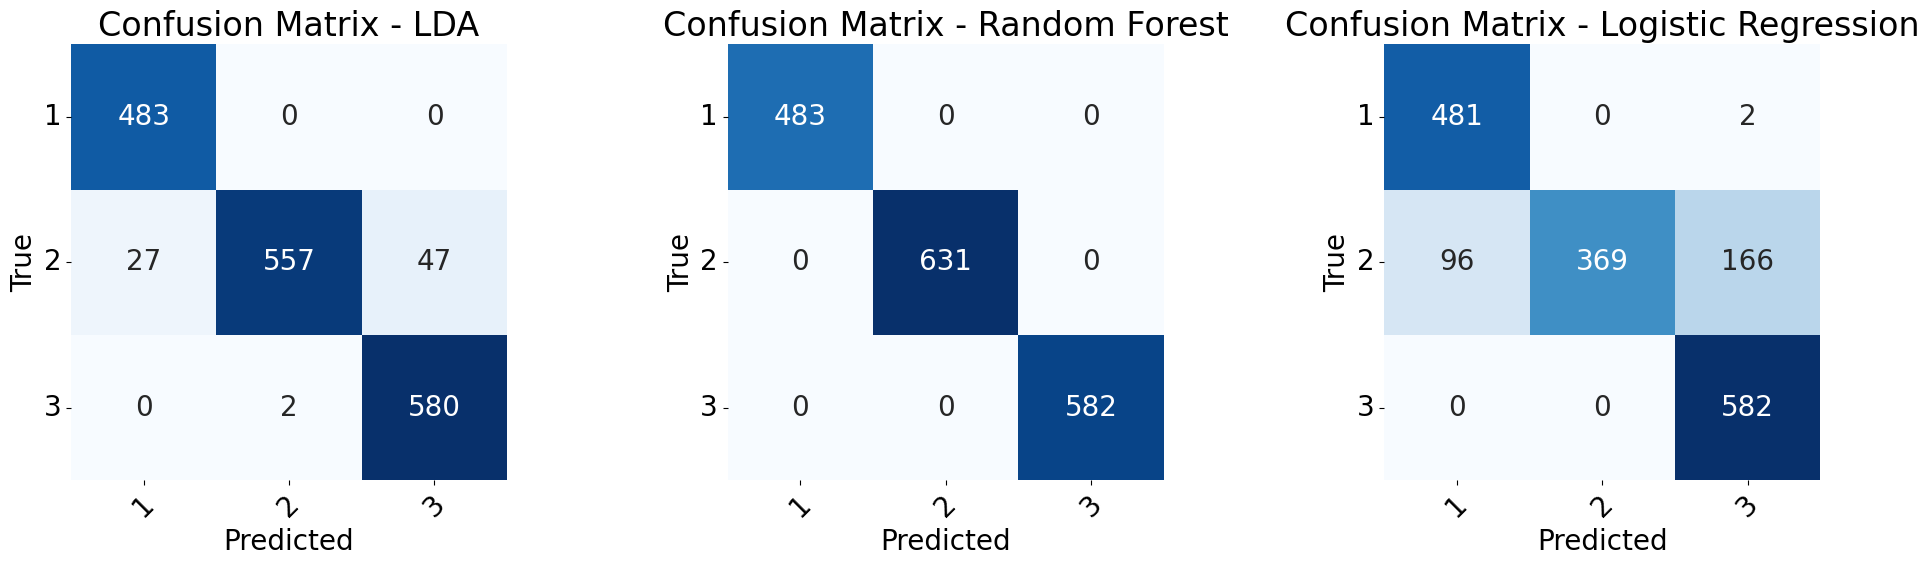

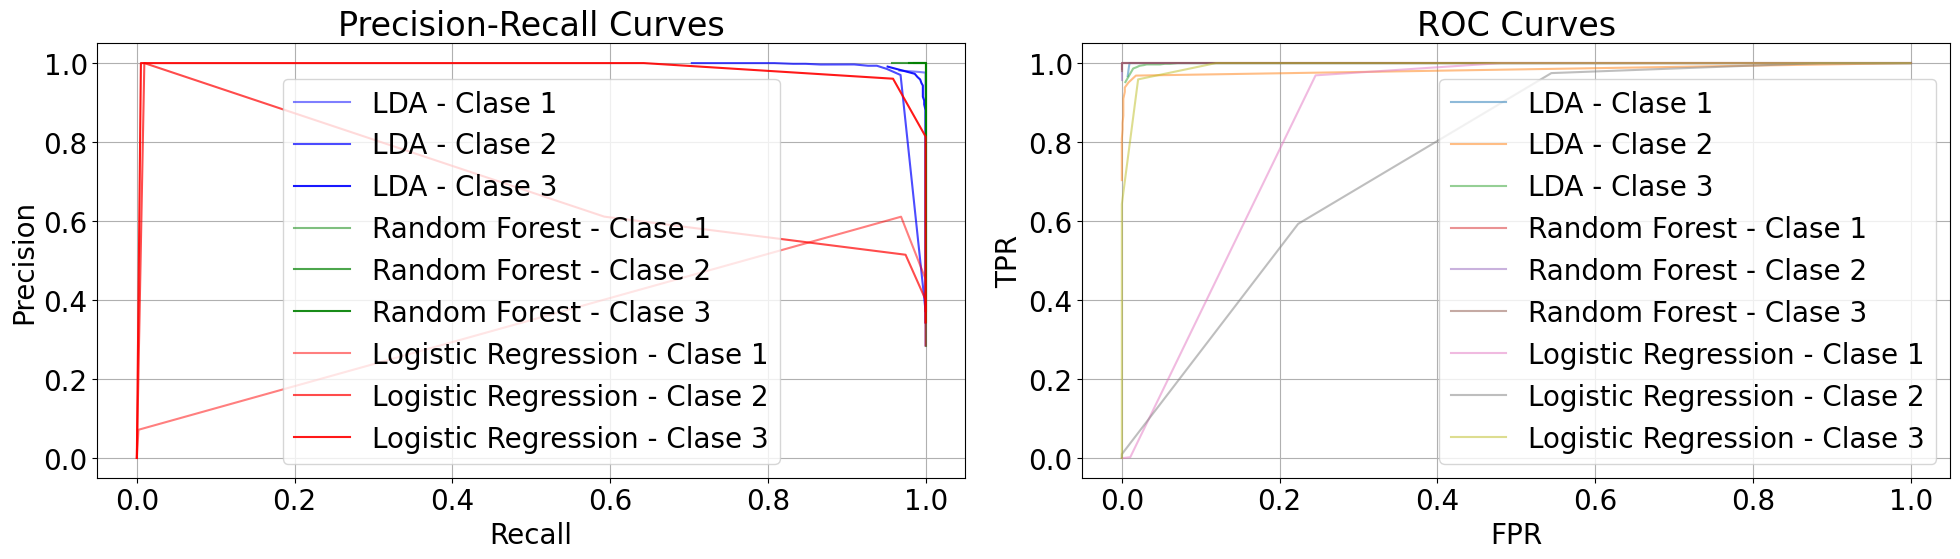

,Metric,LDA,Random Forest,Logistic Regression
0,Accuracy,0.955189,1.000000,0.844340
1,Precision (Class 1),0.947059,1.000000,0.833622
2,Precision (Class 2),0.996422,1.000000,1.000000
3,Precision (Class 3),0.925040,1.000000,0.776000
4,Recall (Class 1),1.000000,1.000000,0.995859
5,Recall (Class 2),0.882726,1.000000,0.584786
6,Recall (Class 3),0.996564,1.000000,1.000000
7,F1-score (Class 1),0.972810,1.000000,0.907547
8,F1-score (Class 2),0.936134,1.000000,0.738000
9,F1-score (Class 3),0.959471,1.000000,0.873874


In [37]:
importlib.reload(met2)
metricas_lda = met2.get_numeric_metrics_multiclass(y_test_war, model_prediction_LDA, model_LDA_proba, thresholds_lda, thresholds_lda)
metricas_rf = met2.get_numeric_metrics_multiclass(y_test_war, prediction_rf, prediction_proba_rf, thresholds_rf, thresholds_rf)
metricas_reg = met2.get_numeric_metrics_multiclass(y_test_war, model_prediction_multiclass, model_proba_multiclass, thresholds_log, thresholds_log)

met2.graph_all_for_3(
    metricas_lda,
    metricas_rf,
    metricas_reg,
    y_test_war,
    model_LDA_proba,
    model_prediction_LDA,
    prediction_proba_rf,
    prediction_rf,
    model_proba_multiclass,
    model_prediction_multiclass,
    thresholds_lda,
    thresholds_lda,
    thresholds_rf,
    thresholds_rf,
    thresholds_log,
    thresholds_log
)